In [1]:
#import packaages
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
from sklearn.model_selection import StratifiedKFold
from scipy.stats import wilcoxon
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, log_loss
from pandas.api.types import CategoricalDtype
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC, SVC
from sklearn import tree
import statistics 
from sklearn.model_selection import KFold
from matplotlib import pyplot
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics.pairwise import euclidean_distances
from imblearn.over_sampling import SMOTE 
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import csv
from pandas.plotting import scatter_matrix
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
#load daset
data_path = os.path.join(os.getcwd(), 'outputB.csv')
data = pd.read_csv(data_path, delimiter = ',')
data.head(5)

,ID,Apgar,Mean,SD,Sample Entropy,Approximate Entropy,LTV,STV,pH,C,...,Average Baseline,Longest Acc,Longest Dcc,Xapn,Age,Gravidity,Parity,Diabetes,Hypertension,Gravidity_imp
0,1001,8,137.45,17.194,0.053085,0.078616,16.532,2.5142,7.14,0.27744,...,141.09,95.00,171.25,3.3490,32,1.0,0,1,0,1.0
1,1010,9,125.53,16.069,0.027505,0.048909,15.797,1.6795,7.35,0.38038,...,131.53,19.00,361.25,2.2089,23,1.0,0,0,0,1.0
2,1100,7,130.19,19.785,0.057006,0.063969,16.075,2.6028,7.18,0.37559,...,134.29,78.75,223.75,2.2095,31,1.0,0,0,0,1.0
3,1101,8,123.35,21.500,0.025599,0.043087,15.628,2.1074,7.16,0.36607,...,130.11,186.50,226.25,3.1582,36,1.0,0,0,0,1.0
4,1102,10,135.53,13.585,0.028232,0.041393,16.424,1.2269,7.35,0.36762,...,138.63,38.25,181.00,2.1251,28,1.0,0,0,0,1.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   552 non-null    int64  
 1   Apgar                552 non-null    int64  
 2   Mean                 552 non-null    float64
 3   SD                   552 non-null    float64
 4   Sample Entropy       552 non-null    float64
 5   Approximate Entropy  552 non-null    float64
 6   LTV                  552 non-null    float64
 7   STV                  552 non-null    float64
 8   pH                   552 non-null    float64
 9   C                    552 non-null    float64
 10  Delta                552 non-null    float64
 11  Delta Total          552 non-null    float64
 12  Number of IMF        552 non-null    int64  
 13  psd_VLF              552 non-null    float64
 14  psd_LF               552 non-null    float64
 15  psd_MF               552 non-null    flo

In [4]:
#recode Apgar score
data['Apgar'] = data['Apgar'].map(lambda v: 0 if v > 6  else 1)
data['Apgar'].value_counts()

0    533
1     19
Name: Apgar, dtype: int64

In [3]:
#recode Apgar score
data['pH'] = data['pH'].map(lambda v: 0 if v > 7.20  else 1)
data['pH'].value_counts()

0    358
1    194
Name: pH, dtype: int64

In [5]:
#recode Apgar score
#data['pH'] = data['pH'].map(lambda v: 0 if v > 7.20  else 1)
#data['pH'].value_counts()

X = data.drop(['ID', 'Apgar','pH', 'Gravidity', 'Age', 'Parity', 'Diabetes', 'Hypertension', 'Gravidity_imp', 'Delta', 'Delta Total'], axis = 1)
print(X.shape)
column_names = list(X.columns) 
print(column_names)

#y labels
y = data['Apgar']  ### change this to adapt to Apagr or pH as labels
print(y.shape)

(552, 20)
['Mean', 'SD', 'Sample Entropy', 'Approximate Entropy', 'LTV', 'STV', 'C', 'Number of IMF', 'psd_VLF', 'psd_LF', 'psd_MF', 'psd_HF', 'rLFHF', 'rSVB', 'Number of Acc', 'Number of Dcc', 'Average Baseline', 'Longest Acc', 'Longest Dcc', 'Xapn']
(552,)


In [6]:
y.value_counts()

0    533
1     19
Name: Apgar, dtype: int64

# baseline

In [72]:
print(column_names)

['Mean', 'SD', 'Sample Entropy', 'Approximate Entropy', 'LTV', 'STV', 'C', 'Number of IMF', 'psd_VLF', 'psd_LF', 'psd_MF', 'psd_HF', 'rLFHF', 'rSVB', 'Number of Acc', 'Number of Dcc', 'Average Baseline', 'Longest Acc', 'Longest Dcc', 'Xapn']


## SVM

{'C': 100, 'kernel': 'rbf'}
AUROC gridsearch mean: 0.469 (+/- 0.000)
{'C': 10, 'kernel': 'rbf'}
AUROC gridsearch mean: 0.517 (+/- 0.000)
{'C': 10, 'kernel': 'rbf'}
AUROC gridsearch mean: 0.579 (+/- 0.000)


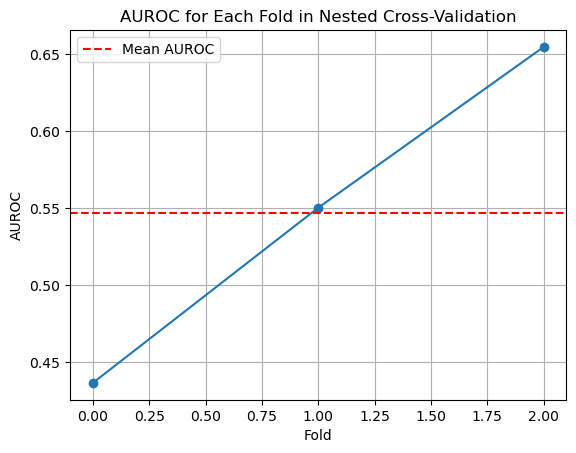

,AUROC,precision,recall,f1,PPV,NPV,Sensitivity,Specificity,brier
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,0.547063,0.501268,0.521684,0.409603,0.489899,0.512637,0.092131,0.951237,0.471907
std,0.109180,0.231932,0.055156,0.094305,0.435546,0.030571,0.099557,0.011606,0.041628
min,0.436356,0.242029,0.469101,0.319312,0.000000,0.484058,0.000000,0.938202,0.424580
25%,0.493269,0.407351,0.492978,0.360671,0.318182,0.496520,0.039326,0.946629,0.456435
50%,0.550183,0.572673,0.516854,0.402031,0.636364,0.508982,0.078652,0.955056,0.488291
75%,0.602416,0.630888,0.547975,0.454748,0.734848,0.526927,0.138196,0.957754,0.495571
max,0.654649,0.689103,0.579096,0.507466,0.833333,0.544872,0.197740,0.960452,0.502851


In [11]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from imblearn.under_sampling import NearMiss
from sklearn.metrics import brier_score_loss
#scale data cdode cant run without scalling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# define the SVM model
clf = SVC(random_state=42, probability=True, class_weight='balanced')

# Define the hyperparameters to tune using a grid search
param_grid = {'C': [0.1, 1, 10, 100],
            'kernel': ['linear', 'rbf', 'poly']}

# Define the outer loop for nested cross-validation with stratified k-fold
outer_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Define the inner loop for hyperparameter tuning with k-fold
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Perform nested cross-validation
nested_scores = []

# Initialize a list to store AUROC values for each fold
auroc_values = []

#oversample
oversampler = SMOTE(random_state=42)
#X, y = oversampler.fit_resample(X, y)
for i, (train, test) in enumerate(outer_cv.split(X, y)):   
        X_train = X[train]
        y_train = y[train]
        X_test = X[test]
        y_test = y[test]    

        oversampler = SMOTE(random_state=42)
        X_train, y_train = oversampler.fit_resample(X_train, y_train)
        X_test, y_test = oversampler.fit_resample(X_test, y_test)
        gs_score = []
    # Use grid search to tune hyperparameters on the inner loop
        grid_search = GridSearchCV(clf, param_grid=param_grid, cv=inner_cv, scoring='roc_auc')
        grid_search.fit(X_train, y_train)
        print(grid_search.best_params_)

        # print the mean and standard deviation of the AUROC scores
        y_pred = grid_search.predict(X_test)
        gs_score.append(roc_auc_score(y_test, y_pred))
        print('AUROC gridsearch mean: %0.3f (+/- %0.3f)' % (np.mean(gs_score), np.std(gs_score)))

         # Evaluate the model on the testing set from the outer loop
        confusion_mat = confusion_matrix(y_test, y_pred)
         #sensitivity, specificity, 
        #precision, recall, f1, npv, specificity = calculate_metrics(confusion_mat)
        #ppv, npv

        nested_scores.append({
        'AUROC': roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1]),
        'precision': precision_score(y_test, y_pred, average='weighted'),
        'recall': recall_score(y_test, y_pred, average='weighted'),
        'f1': f1_score(y_test, y_pred, average='weighted'),
        #'AUROC': roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1]),
        'PPV': precision_score(y_test, y_pred, average='binary', pos_label=1),
        'NPV': precision_score(y_test, y_pred, average='binary', pos_label=0),
        'Sensitivity': recall_score(y_test, y_pred, average='binary', pos_label=1),
        'Specificity': recall_score(y_test, y_pred, average='binary', pos_label=0),
        'brier' : brier_score_loss(y_test, grid_search.predict_proba(X_test)[:, 1])

        })

# Calculate the mean AUROC across all folds
mean_auroc = np.mean([score['AUROC'] for score in nested_scores])

# Create a plot to visualize the mean AUROC value
plt.figure()
plt.plot(range(len(nested_scores)), [score['AUROC'] for score in nested_scores], marker='o', linestyle='-')
plt.axhline(y=mean_auroc, color='r', linestyle='--', label='Mean AUROC')
plt.xlabel('Fold')
plt.ylabel('AUROC')
plt.title('AUROC for Each Fold in Nested Cross-Validation')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
# Print the mean and standard deviation of the scores
score = pd.DataFrame(nested_scores)
score.describe()

## RF

{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 300}
AUROC gridsearch mean: 0.508 (+/- 0.000)
{'criterion': 'gini', 'max_depth': 20, 'n_estimators': 250}
AUROC gridsearch mean: 0.508 (+/- 0.000)
{'criterion': 'gini', 'max_depth': 20, 'n_estimators': 300}
AUROC gridsearch mean: 0.540 (+/- 0.000)


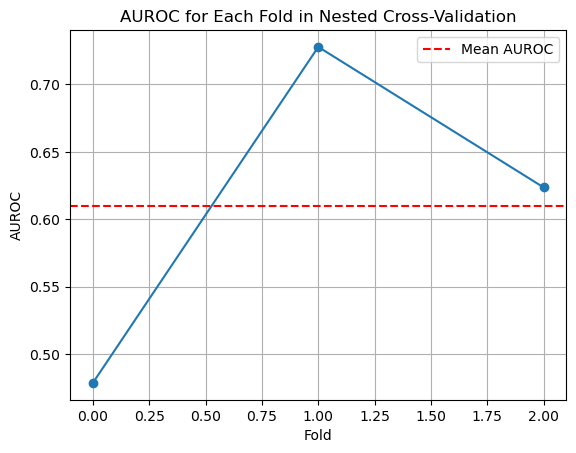

,AUROC,precision,recall,f1,PPV,NPV,Sensitivity,Specificity,brier
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,0.610017,0.691028,0.518801,0.392597,0.691028,0.509944,0.063861,0.973740,0.367005
std,0.125048,0.116893,0.017968,0.033722,0.116893,0.009648,0.034638,0.011675,0.051842
min,0.478743,0.588235,0.508427,0.365419,0.588235,0.504323,0.033708,0.960674,0.316658
25%,0.551159,0.627451,0.508427,0.373728,0.627451,0.504374,0.044944,0.969038,0.340397
50%,0.623576,0.666667,0.508427,0.382036,0.666667,0.504425,0.056180,0.977401,0.364137
75%,0.675654,0.742424,0.523987,0.406185,0.742424,0.512755,0.078937,0.980274,0.392179
max,0.727733,0.818182,0.539548,0.430334,0.818182,0.521084,0.101695,0.983146,0.420222


In [13]:


from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from imblearn.under_sampling import NearMiss

# define the SVM model
clf = RandomForestClassifier(random_state=42)

# Define the hyperparameters to tune using a grid search
param_grid = {
    "n_estimators": [50, 100, 150, 200, 250, 300],
    "max_depth": [3, 5, 10, 15, 20],
    "criterion": ["gini", "entropy"]
}

# Define the outer loop for nested cross-validation with stratified k-fold
outer_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Define the inner loop for hyperparameter tuning with k-fold
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Perform nested cross-validation
nested_scores = []

# Initialize a list to store AUROC values for each fold
auroc_values = []

#oversample
oversampler = SMOTE(random_state=42)
#X, y = oversampler.fit_resample(X, y)
for i, (train, test) in enumerate(outer_cv.split(X, y)):   
        X_train = X[train]
        y_train = y[train]
        X_test = X[test]
        y_test = y[test]    

        oversampler = SMOTE(random_state=42)
        X_train, y_train = oversampler.fit_resample(X_train, y_train)
        X_test, y_test = oversampler.fit_resample(X_test, y_test)
        gs_score = []
    # Use grid search to tune hyperparameters on the inner loop
        grid_search = GridSearchCV(clf, param_grid=param_grid, cv=inner_cv, scoring='roc_auc')
        grid_search.fit(X_train, y_train)
        print(grid_search.best_params_)

        # print the mean and standard deviation of the AUROC scores
        y_pred = grid_search.predict(X_test)
        gs_score.append(roc_auc_score(y_test, y_pred))
        print('AUROC gridsearch mean: %0.3f (+/- %0.3f)' % (np.mean(gs_score), np.std(gs_score)))

         # Evaluate the model on the testing set from the outer loop
        confusion_mat = confusion_matrix(y_test, y_pred)
         #sensitivity, specificity, 
        #precision, recall, f1, npv, specificity = calculate_metrics(confusion_mat)
        #ppv, npv

        nested_scores.append({
        'AUROC': roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1]),
        'precision': precision_score(y_test, y_pred, average='binary'),
        'recall': recall_score(y_test, y_pred, average='weighted'),
        'f1': f1_score(y_test, y_pred, average='weighted'),
        #'AUROC': roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1]),
        'PPV': precision_score(y_test, y_pred, average='binary', pos_label=1),
        'NPV': precision_score(y_test, y_pred, average='binary', pos_label=0),
        'Sensitivity': recall_score(y_test, y_pred, average='binary', pos_label=1),
        'Specificity': recall_score(y_test, y_pred, average='binary', pos_label=0),
        'brier' : brier_score_loss(y_test, grid_search.predict_proba(X_test)[:, 1])

        })

# Calculate the mean AUROC across all folds
mean_auroc = np.mean([score['AUROC'] for score in nested_scores])

# Create a plot to visualize the mean AUROC value
plt.figure()
plt.plot(range(len(nested_scores)), [score['AUROC'] for score in nested_scores], marker='o', linestyle='-')
plt.axhline(y=mean_auroc, color='r', linestyle='--', label='Mean AUROC')
plt.xlabel('Fold')
plt.ylabel('AUROC')
plt.title('AUROC for Each Fold in Nested Cross-Validation')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
# Print the mean and standard deviation of the scores
score = pd.DataFrame(nested_scores)
score.describe()

## 1. RFE

In [45]:
# for apgar as label
X = X[['Mean', 'SD', 'STV', 'C', 'Number of IMF', 'Number of Dcc']]
       
#Parity','Diabetes', 'Hypertension', 'Gravidity_imp

In [46]:
#scale data cdode cant run without scalling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [30]:
#for pH as label
X = X[['SD', 'Delta Total', 'psd_MF', 'Number of Acc', 'Xapn', 'Age', 'Diabetes', 'Hypertension', 'Gravidity_imp']]

In [ ]:
def calculate_metrics(confusion_matrix):
    """
    Calculates performance metrics from a confusion matrix.

    Args:
        confusion_matrix (list of lists): The confusion matrix.

    Returns:
        dict: A dictionary containing the calculated performance metrics.
    """
    metrics = {}

    true_positive = confusion_matrix[1][1]
    false_positive = confusion_matrix[0][1]
    false_negative = confusion_matrix[1][0]
    true_negative = confusion_matrix[0][0]

    accuracy = (true_positive + true_negative) / sum(sum(row) for row in confusion_matrix)
    precision = true_positive / (true_positive + false_positive)
    recall = true_positive / (true_positive + false_negative)
    f1_score = 2 * (precision * recall) / (precision + recall)
    positive_predictive_value = true_positive / (true_positive + false_positive)
    negative_predictive_value = true_negative / (true_negative + false_negative)

    metrics['Accuracy'] = accuracy
    metrics['Precision'] = precision
    metrics['Recall'] = recall
    metrics['F1 Score'] = f1_score
    metrics['Positive Predictive Value'] = positive_predictive_value
    metrics['Negative Predictive Value'] = negative_predictive_value

    return metrics


In [32]:
X

array([[ 0.23371326,  0.28320652,  0.33405004, -1.45583443,  0.54112593,
         0.56020499],
       [-0.78222339,  0.04917048, -0.81005495,  0.45039082, -0.32972396,
        -0.18314394],
       [-0.38505352,  0.82221751,  0.45549212,  0.36169043, -0.32972396,
        -0.03447415],
       ...,
       [ 1.07663385, -0.31800606, -0.3713009 ,  0.56890493,  1.41197581,
        -0.33181372],
       [ 2.13177611, -0.87594797, -0.29865496, -0.68623348, -0.32972396,
         0.4115352 ],
       [-0.22226502, -0.07128007,  0.56994374,  0.09262638,  0.54112593,
        -0.48048351]])

In [25]:
def calculate_metrics(confusion_matrix):
    true_positive = confusion_matrix[0][0]
    false_positive = confusion_matrix[0][1]
    false_negative = confusion_matrix[1][0]
    true_negative = confusion_matrix[1][1]

    sensitivity = true_positive / (true_positive + false_negative)
    specificity = true_negative / (true_negative + false_positive)
    precision = true_positive / (true_positive + false_positive)
    recall = sensitivity
    ppv = precision
    npv = true_negative / (true_negative + false_negative)

    return sensitivity, specificity, precision, recall, ppv, npv


In [48]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import numpy as np
from sklearn.metrics import confusion_matrix, brier_score_loss

def calculate_metrics(confusion_matrix):
    tn, fp, fn, tp = confusion_matrix.ravel()
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2 * precision * recall / (precision + recall)
    npv = tn / (tn + fn)
    specificity = tn / (tn + fp)
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    #FPR = fp / (fp + tn)
    #FNR = fn / (fn + tp)
    return precision, recall, f1, npv, specificity, accuracy#, FPR, FNR

# define the SVM model
clf = SVC(random_state=42, probability=True)

# Define the hyperparameters to tune using a grid search
param_grid = {'C': [0.1, 1, 10, 100],
              'kernel': ['linear', 'rbf', 'poly']}

# Define the outer loop for nested cross-validation with stratified k-fold
outer_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Define the inner loop for hyperparameter tuning with k-fold
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform nested cross-validation
nested_scores = []

for i, (train, test) in enumerate(outer_cv.split(X, y)):
    X_train = X[train]
    y_train = y[train]
    X_test = X[test]
    y_test = y[test]

    oversampler = SMOTE(random_state=42)
    X_train, y_train = oversampler.fit_resample(X_train, y_train)
    X_test, y_test = oversampler.fit_resample(X_test, y_test)

    gs_scores = []

    # Use grid search to tune hyperparameters on the inner loop
    grid_search = GridSearchCV(clf, param_grid=param_grid, cv=inner_cv, scoring='roc_auc')
    grid_search = grid_search.fit(X_train, y_train)
    print(grid_search.best_params_)

    # Print the mean and standard deviation of the AUROC scores
    y_pred = grid_search.predict(X_test)
    gs_scores.append(roc_auc_score(y_test, y_pred))
    print('AUROC gridsearch mean: %0.3f (+/- %0.3f)' % (np.mean(gs_scores), np.std(gs_scores)))

    # Evaluate the model on the testing set from the outer loop
    confusion_mat = confusion_matrix(y_test, y_pred)
    #sensitivity, specificity, 
    precision, recall, f1, npv, specificity, accuracy = calculate_metrics(confusion_mat)
    #ppv, npv

    nested_scores.append({
        'AUROC': roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1]),
        'precision': precision_score(y_test, y_pred, average='binary'),
        'recall': recall_score(y_test, y_pred, average='weighted'),
        'f1': f1_score(y_test, y_pred, average='weighted'),
        #'AUROC': roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1]),
        'PPV': precision_score(y_test, y_pred, average='binary', pos_label=1),
        'NPV': precision_score(y_test, y_pred, average='binary', pos_label=0),
        'Sensitivity': recall_score(y_test, y_pred, average='binary', pos_label=1),
        'Specificity': recall_score(y_test, y_pred, average='binary', pos_label=0),
        'brier' : brier_score_loss(y_test, grid_search.predict_proba(X_test)[:, 1])
       
    })

# Print the mean and standard deviation of the scores
score = pd.DataFrame(nested_scores)
score.describe()


{'C': 100, 'kernel': 'rbf'}
AUROC gridsearch mean: 0.497 (+/- 0.000)
{'C': 100, 'kernel': 'rbf'}
AUROC gridsearch mean: 0.576 (+/- 0.000)
{'C': 10, 'kernel': 'rbf'}
AUROC gridsearch mean: 0.556 (+/- 0.000)


,AUROC,precision,recall,f1,PPV,NPV,Sensitivity,Specificity,brier
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,0.517369,0.631225,0.543177,0.465950,0.631225,0.525735,0.170814,0.915540,0.431136
std,0.013694,0.135637,0.040983,0.075649,0.135637,0.024290,0.095008,0.017140,0.042562
min,0.504766,0.478261,0.497191,0.379580,0.478261,0.498498,0.061798,0.898305,0.399662
25%,0.510083,0.578416,0.526844,0.438703,0.578416,0.516028,0.138244,0.907018,0.406923
50%,0.515401,0.678571,0.556497,0.497827,0.678571,0.533557,0.214689,0.915730,0.414184
75%,0.523671,0.707707,0.566170,0.509135,0.707707,0.539354,0.225322,0.924157,0.446873
max,0.531940,0.736842,0.575843,0.520442,0.736842,0.545151,0.235955,0.932584,0.479561


In [17]:
y_test.value_counts()

0    177
1    177
Name: Apgar, dtype: int64

In [52]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import numpy as np

def calculate_metrics(confusion_matrix):
    tn, fp, fn, tp = confusion_matrix.ravel()
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2 * precision * recall / (precision + recall)
    npv = tn / (tn + fn)
    specificity = tn / (tn + fp)
    return precision, recall, f1, npv, specificity

# define the SVM model
clf = SVC(random_state=42, probability=True)

# Define the hyperparameters to tune using a grid search
param_grid = {'C': [0.1, 1, 10, 100],
              'kernel': ['linear', 'rbf', 'poly']}

# Define the outer loop for nested cross-validation with stratified k-fold
outer_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Define the inner loop for hyperparameter tuning with k-fold
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Perform nested cross-validation
nested_scores = []

for i, (train, test) in enumerate(outer_cv.split(X, y)):
    X_train = X[train]
    y_train = y[train]
    X_test = X[test]
    y_test = y[test]

    oversampler = SMOTE(random_state=42)
    X_train, y_train = oversampler.fit_resample(X_train, y_train)
    X_test, y_test = oversampler.fit_resample(X_test, y_test)


    gs_scores = []

    # Use grid search to tune hyperparameters on the inner loop
    grid_search = GridSearchCV(clf, param_grid=param_grid, cv=inner_cv, scoring='roc_auc')
    grid_search.fit(X_train, y_train)
    print(grid_search.best_params_)

    # Print the mean and standard deviation of the AUROC scores
    y_pred = grid_search.predict(X_test)
    gs_scores.append(roc_auc_score(y_test, y_pred))
    print('AUROC gridsearch mean: %0.3f (+/- %0.3f)' % (np.mean(gs_scores), np.std(gs_scores)))

    # Evaluate the model on the testing set from the outer loop
    confusion_mat = confusion_matrix(y_test, y_pred)
    #sensitivity, specificity, 
    precision, recall, f1, npv, specificity = calculate_metrics(confusion_mat)
    #ppv, npv

    nested_scores.append({
       'AUROC': roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1]),
        'precision': precision_score(y_test, y_pred, average='weighted'),
        'recall': recall_score(y_test, y_pred, average='weighted'),
        'f1': f1_score(y_test, y_pred, average='weighted'),
        #'AUROC': roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1]),
        'PPV': precision_score(y_test, y_pred, average='binary', pos_label=1),
        'NPV': precision_score(y_test, y_pred, average='binary', pos_label=0),
        'Sensitivity': recall_score(y_test, y_pred, average='binary', pos_label=1),
        'Specificity': recall_score(y_test, y_pred, average='binary', pos_label=0),
        'brier' : brier_score_loss(y_test, grid_search.predict_proba(X_test)[:, 1])
       
    })

# Print the mean and standard deviation of the scores
score = pd.DataFrame(nested_scores)
score.describe()

{'C': 10, 'kernel': 'rbf'}
AUROC gridsearch mean: 0.469 (+/- 0.000)
{'C': 10, 'kernel': 'rbf'}
AUROC gridsearch mean: 0.593 (+/- 0.000)
{'C': 10, 'kernel': 'rbf'}
AUROC gridsearch mean: 0.556 (+/- 0.000)


,AUROC,precision,recall,f1,PPV,NPV,Sensitivity,Specificity,brier
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,0.508621,0.525959,0.539432,0.456495,0.527466,0.524453,0.163323,0.915540,0.435341
std,0.012825,0.190393,0.063540,0.113347,0.344409,0.036883,0.134003,0.015188,0.060089
min,0.493830,0.308602,0.469101,0.328282,0.133333,0.483871,0.011236,0.898305,0.388692
25%,0.504615,0.457333,0.512799,0.413054,0.405952,0.508714,0.112963,0.909827,0.401438
50%,0.515401,0.606064,0.556497,0.497827,0.678571,0.533557,0.214689,0.921348,0.414184
75%,0.516017,0.634638,0.574597,0.520601,0.724532,0.544745,0.239367,0.924157,0.458665
max,0.516633,0.663212,0.592697,0.543376,0.770492,0.555932,0.264045,0.926966,0.503147


In [9]:
def calculate_metrics(confusion_matrix):
    tn, fp, fn, tp = confusion_matrix.ravel()
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2 * precision * recall / (precision + recall)
    npv = tn / (tn + fn)
    specificity = tn / (tn + fp)
    return precision, recall, f1, npv, specificity

{'C': 100, 'kernel': 'rbf'}
AUROC gridsearch mean: 0.497 (+/- 0.000)
{'C': 100, 'kernel': 'rbf'}
AUROC gridsearch mean: 0.576 (+/- 0.000)
{'C': 10, 'kernel': 'rbf'}
AUROC gridsearch mean: 0.556 (+/- 0.000)


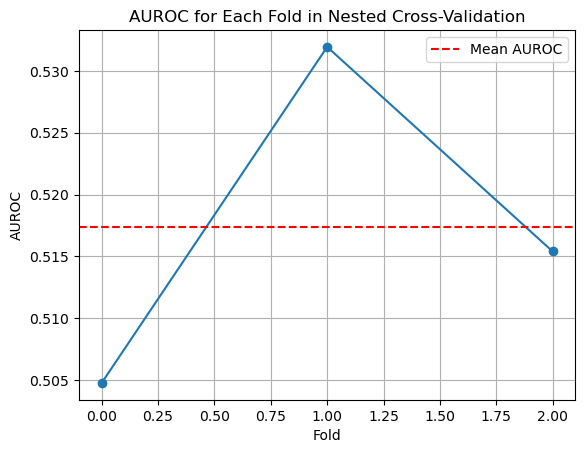

,AUROC,precision,recall,f1,PPV,NPV,Sensitivity,Specificity,brier
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,0.517369,0.578480,0.543177,0.465950,0.631225,0.525735,0.170814,0.915540,0.431136
std,0.013694,0.079960,0.040983,0.075649,0.135637,0.024290,0.095008,0.017140,0.042562
min,0.504766,0.488380,0.497191,0.379580,0.478261,0.498498,0.061798,0.898305,0.399662
25%,0.510083,0.547222,0.526844,0.438703,0.578416,0.516028,0.138244,0.907018,0.406923
50%,0.515401,0.606064,0.556497,0.497827,0.678571,0.533557,0.214689,0.915730,0.414184
75%,0.523671,0.623530,0.566170,0.509135,0.707707,0.539354,0.225322,0.924157,0.446873
max,0.531940,0.640996,0.575843,0.520442,0.736842,0.545151,0.235955,0.932584,0.479561


In [12]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from imblearn.under_sampling import NearMiss
from sklearn.metrics import brier_score_loss

# define the SVM model
clf = SVC(random_state=42, probability=True, class_weight='balanced')

# Define the hyperparameters to tune using a grid search
param_grid = {'C': [0.1, 1, 10, 100],
            'kernel': ['linear', 'rbf', 'poly']}

# Define the outer loop for nested cross-validation with stratified k-fold
outer_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Define the inner loop for hyperparameter tuning with k-fold
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform nested cross-validation
nested_scores = []

# Initialize a list to store AUROC values for each fold
auroc_values = []

#oversample
oversampler = SMOTE(random_state=42)
#X, y = oversampler.fit_resample(X, y)
for i, (train, test) in enumerate(outer_cv.split(X, y)):   
        X_train = X[train]
        y_train = y[train]
        X_test = X[test]
        y_test = y[test]    

        oversampler = SMOTE(random_state=42)
        X_train, y_train = oversampler.fit_resample(X_train, y_train)
        X_test, y_test = oversampler.fit_resample(X_test, y_test)
        gs_score = []
    # Use grid search to tune hyperparameters on the inner loop
        grid_search = GridSearchCV(clf, param_grid=param_grid, cv=inner_cv, scoring='roc_auc')
        grid_search.fit(X_train, y_train)
        print(grid_search.best_params_)

        # print the mean and standard deviation of the AUROC scores
        y_pred = grid_search.predict(X_test)
        gs_score.append(roc_auc_score(y_test, y_pred))
        print('AUROC gridsearch mean: %0.3f (+/- %0.3f)' % (np.mean(gs_score), np.std(gs_score)))

         # Evaluate the model on the testing set from the outer loop
        confusion_mat = confusion_matrix(y_test, y_pred)
         #sensitivity, specificity, 
        #precision, recall, f1, npv, specificity = calculate_metrics(confusion_mat)
        #ppv, npv

        nested_scores.append({
        'AUROC': roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1]),
        'precision': precision_score(y_test, y_pred, average='weighted'),
        'recall': recall_score(y_test, y_pred, average='weighted'),
        'f1': f1_score(y_test, y_pred, average='weighted'),
        #'AUROC': roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1]),
        'PPV': precision_score(y_test, y_pred, average='binary', pos_label=1),
        'NPV': precision_score(y_test, y_pred, average='binary', pos_label=0),
        'Sensitivity': recall_score(y_test, y_pred, average='binary', pos_label=1),
        'Specificity': recall_score(y_test, y_pred, average='binary', pos_label=0),
        'brier' : brier_score_loss(y_test, grid_search.predict_proba(X_test)[:, 1])

        })

# Calculate the mean AUROC across all folds
mean_auroc = np.mean([score['AUROC'] for score in nested_scores])

# Create a plot to visualize the mean AUROC value
plt.figure()
plt.plot(range(len(nested_scores)), [score['AUROC'] for score in nested_scores], marker='o', linestyle='-')
plt.axhline(y=mean_auroc, color='r', linestyle='--', label='Mean AUROC')
plt.xlabel('Fold')
plt.ylabel('AUROC')
plt.title('AUROC for Each Fold in Nested Cross-Validation')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
# Print the mean and standard deviation of the scores
score = pd.DataFrame(nested_scores)
score.describe()

In [23]:
roc =  roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1])

#### change boundaries make the results looks amazing!

{'criterion': 'gini', 'max_depth': 15, 'n_estimators': 150}
AUROC gridsearch mean: 0.503 (+/- 0.000)
{'criterion': 'gini', 'max_depth': 15, 'n_estimators': 200}
AUROC gridsearch mean: 0.607 (+/- 0.000)
{'criterion': 'gini', 'max_depth': 20, 'n_estimators': 250}
AUROC gridsearch mean: 0.616 (+/- 0.000)


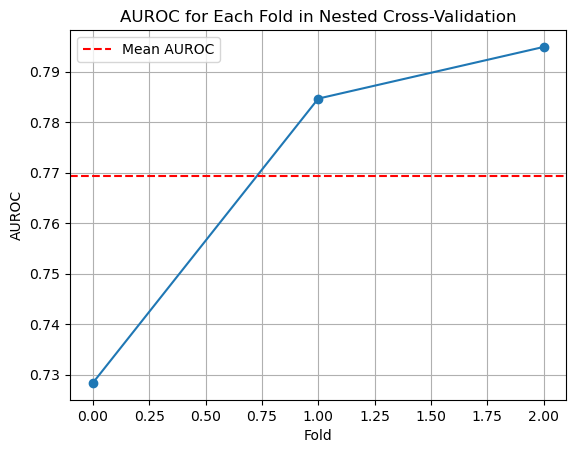

,AUROC,precision,recall,f1,PPV,NPV,Sensitivity,Specificity,brier
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,0.769286,0.753137,0.575123,0.495810,0.753137,0.544302,0.191508,0.958738,0.291001
std,0.035820,0.191832,0.062790,0.108217,0.191832,0.037173,0.126931,0.008499,0.043284
min,0.728349,0.533333,0.502809,0.370931,0.533333,0.501466,0.044944,0.949438,0.265023
25%,0.756494,0.686310,0.554775,0.462671,0.686310,0.532400,0.154494,0.955056,0.266018
50%,0.784639,0.839286,0.606742,0.554411,0.839286,0.563333,0.264045,0.960674,0.267012
75%,0.789755,0.863039,0.611280,0.558250,0.863039,0.565720,0.264791,0.963388,0.303990
max,0.794871,0.886792,0.615819,0.562088,0.886792,0.568106,0.265537,0.966102,0.340968


In [53]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from imblearn.under_sampling import NearMiss

# define the SVM model
clf = RandomForestClassifier(random_state=42)

# Define the hyperparameters to tune using a grid search
param_grid = {
    "n_estimators": [50, 100, 150, 200, 250, 300],
    "max_depth": [3, 5, 10, 15, 20],
    "criterion": ["gini", "entropy"]
}

# Define the outer loop for nested cross-validation with stratified k-fold
outer_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Define the inner loop for hyperparameter tuning with k-fold
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Perform nested cross-validation
nested_scores = []

# Initialize a list to store AUROC values for each fold
auroc_values = []

#oversample
oversampler = SMOTE(random_state=42)
#X, y = oversampler.fit_resample(X, y)
for i, (train, test) in enumerate(outer_cv.split(X, y)):   
        X_train = X[train]
        y_train = y[train]
        X_test = X[test]
        y_test = y[test]    

        oversampler = SMOTE(random_state=42)
        X_train, y_train = oversampler.fit_resample(X_train, y_train)
        X_test, y_test = oversampler.fit_resample(X_test, y_test)
        gs_score = []
    # Use grid search to tune hyperparameters on the inner loop
        grid_search = GridSearchCV(clf, param_grid=param_grid, cv=inner_cv, scoring='roc_auc')
        grid_search.fit(X_train, y_train)
        print(grid_search.best_params_)

        # print the mean and standard deviation of the AUROC scores
        y_pred = grid_search.predict(X_test)
        gs_score.append(roc_auc_score(y_test, y_pred))
        print('AUROC gridsearch mean: %0.3f (+/- %0.3f)' % (np.mean(gs_score), np.std(gs_score)))

         # Evaluate the model on the testing set from the outer loop
        confusion_mat = confusion_matrix(y_test, y_pred)
         #sensitivity, specificity, 
        #precision, recall, f1, npv, specificity = calculate_metrics(confusion_mat)
        #ppv, npv

        nested_scores.append({
        'AUROC': roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1]),
        'precision': precision_score(y_test, y_pred, average='binary'),
        'recall': recall_score(y_test, y_pred, average='weighted'),
        'f1': f1_score(y_test, y_pred, average='weighted'),
        #'AUROC': roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1]),
        'PPV': precision_score(y_test, y_pred, average='binary', pos_label=1),
        'NPV': precision_score(y_test, y_pred, average='binary', pos_label=0),
        'Sensitivity': recall_score(y_test, y_pred, average='binary', pos_label=1),
        'Specificity': recall_score(y_test, y_pred, average='binary', pos_label=0),
        'brier' : brier_score_loss(y_test, grid_search.predict_proba(X_test)[:, 1])

        })

# Calculate the mean AUROC across all folds
mean_auroc = np.mean([score['AUROC'] for score in nested_scores])

# Create a plot to visualize the mean AUROC value
plt.figure()
plt.plot(range(len(nested_scores)), [score['AUROC'] for score in nested_scores], marker='o', linestyle='-')
plt.axhline(y=mean_auroc, color='r', linestyle='--', label='Mean AUROC')
plt.xlabel('Fold')
plt.ylabel('AUROC')
plt.title('AUROC for Each Fold in Nested Cross-Validation')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
# Print the mean and standard deviation of the scores
score = pd.DataFrame(nested_scores)
score.describe()

In [16]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from imblearn.under_sampling import NearMiss

# define the SVM model
clf = RandomForestClassifier(random_state=42)

# Define the hyperparameters to tune using a grid search
param_grid = {
    "n_estimators": [50, 100, 150, 200, 250, 300],
    "max_depth": [3, 5, 10, 15],
    "criterion": ["gini", "entropy"]
}

# Define the outer loop for nested cross-validation with stratified k-fold
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the inner loop for hyperparameter tuning with k-fold
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform nested cross-validation
nested_scores = []

#for train_index, test_index in outer_cv.split(iris.data, iris.target):
    #X_train, X_test = iris.data[train_index], iris.data[test_index]
    #y_train, y_test = iris.target[train_index], iris.target[test_index]

#oversample
oversampler = SMOTE(random_state=42)
#X, y = oversampler.fit_resample(X, y)
for i, (train, test) in enumerate(outer_cv.split(X, y)):   
        X_train = X[train]
        y_train = y[train]
        X_test = X[test]
        y_test = y[test]    


       # X_train, y_train = oversampler.fit_resample(X[train], y[train])
        gs_score = []
    # Use grid search to tune hyperparameters on the inner loop
        grid_search = GridSearchCV(clf, param_grid=param_grid, cv=inner_cv, scoring='roc_auc')
        grid_search.fit(X_train, y_train)
        print(grid_search.best_params_)

        # print the mean and standard deviation of the AUROC scores
        y_pred = grid_search.predict(X_test)
        gs_score.append(roc_auc_score(y_test, y_pred))
        print('AUROC gridsearch mean: %0.3f (+/- %0.3f)' % (np.mean(gs_score), np.std(gs_score)))

        # Evaluate the model on the testing set from the outer loop
        confusion_mat = confusion_matrix(y_test, y_pred)
    #sensitivity, specificity, 
        precision, recall, f1, npv, specificity = calculate_metrics(confusion_mat)
    #ppv, npv

        nested_scores.append({
        'AUROC': roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1]),
        'Precision': precision,
        'Recall/sensitive': recall,
        'f1' : f1,
        'npv': npv,
        'specificity/ppv' : specificity
       
    })

# Print the mean and standard deviation of the scores
score = pd.DataFrame(nested_scores)
score.describe()

{'criterion': 'gini', 'max_depth': 3, 'n_estimators': 50}
AUROC gridsearch mean: 0.504 (+/- 0.000)
{'criterion': 'entropy', 'max_depth': 3, 'n_estimators': 150}
AUROC gridsearch mean: 0.549 (+/- 0.000)
{'criterion': 'entropy', 'max_depth': 3, 'n_estimators': 100}
AUROC gridsearch mean: 0.612 (+/- 0.000)
{'criterion': 'gini', 'max_depth': 3, 'n_estimators': 150}
AUROC gridsearch mean: 0.549 (+/- 0.000)
{'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 200}
AUROC gridsearch mean: 0.596 (+/- 0.000)


,AUROC,Precision,Recall/sensitive,f1,npv,specificity/ppv
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.686499,0.539222,0.252767,0.337853,0.682378,0.871479
std,0.073194,0.126261,0.062231,0.074029,0.023909,0.070710
min,0.586538,0.360000,0.153846,0.244898,0.651163,0.777778
25%,0.632358,0.458333,0.230769,0.281250,0.673267,0.816901
50%,0.718202,0.600000,0.282051,0.349206,0.674419,0.902778
75%,0.745395,0.611111,0.289474,0.392857,0.706522,0.915493
max,0.750000,0.666667,0.307692,0.421053,0.706522,0.944444


### xgb

In [19]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from imblearn.under_sampling import NearMiss
import xgboost as xgb
# define the model
clf = xgb.XGBClassifier()

# define the hyperparameters to tune
param_grid = {
    'objective': ['reg:squarederror', 'reg:logistic'],
    'learning_rate': [.02, .1, .5],
    'max_depth': [5, 10, 20],
    'n_estimators': [20, 50],
    'colsample_bytree': [.5, .7, 1]
    }

# Define the outer loop for nested cross-validation with stratified k-fold
outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define the inner loop for hyperparameter tuning with k-fold
inner_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform nested cross-validation
nested_scores = []

#for train_index, test_index in outer_cv.split(iris.data, iris.target):
    #X_train, X_test = iris.data[train_index], iris.data[test_index]
    #y_train, y_test = iris.target[train_index], iris.target[test_index]

#oversample
oversampler = SMOTE(random_state=42)
#X, y = oversampler.fit_resample(X, y)
for i, (train, test) in enumerate(outer_cv.split(X, y)):   
        X_train = X[train]
        y_train = y[train]
        X_test = X[test]
        y_test = y[test]    


          #X_train, y_train = oversampler.fit_resample(X[train], y[train])
        gs_score = []
    # Use grid search to tune hyperparameters on the inner loop
        grid_search = GridSearchCV(clf, param_grid=param_grid, cv=inner_cv, scoring='roc_auc')
        grid_search.fit(X_train, y_train)
        print(grid_search.best_params_)

        # print the mean and standard deviation of the AUROC scores
        y_pred = grid_search.predict(X_test)
        gs_score.append(roc_auc_score(y_test, y_pred))
        print('AUROC gridsearch mean: %0.3f (+/- %0.3f)' % (np.mean(gs_score), np.std(gs_score)))
# Evaluate the model on the testing set from the outer loop
        confusion_mat = confusion_matrix(y_test, y_pred)
    #sensitivity, specificity, 
        precision, recall, f1, npv, specificity = calculate_metrics(confusion_mat)
    #ppv, npv

        nested_scores.append({
        'AUROC': roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1]),
        'Precision/ppv': precision,
        'Recall/sensitive': recall,
        'f1' : f1,
        'npv': npv,
        'specificity/ppv' : specificity
       
    })
# Print the mean and standard deviation of the scores
score = pd.DataFrame(nested_scores)
score.describe()

{'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 50, 'objective': 'reg:squarederror'}
AUROC gridsearch mean: 0.483 (+/- 0.000)


In [58]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from imblearn.under_sampling import NearMiss
import xgboost as xgb
# define the SVM model
clf = DecisionTreeClassifier(random_state=42)

# define the hyperparameters to tune
param_grid = {
    "max_depth": [3, 5, 10, 15],
    "criterion": ["gini", "entropy", "log_loss"]
   # "max_features": ["sqrt", "log2"]
}

# Define the outer loop for nested cross-validation with stratified k-fold
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the inner loop for hyperparameter tuning with k-fold
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform nested cross-validation
nested_scores = []

#for train_index, test_index in outer_cv.split(iris.data, iris.target):
    #X_train, X_test = iris.data[train_index], iris.data[test_index]
    #y_train, y_test = iris.target[train_index], iris.target[test_index]

#oversample
oversampler = SMOTE(random_state=42)
#X, y = oversampler.fit_resample(X, y)
for i, (train, test) in enumerate(outer_cv.split(X, y)):   
        X_train = X[train]
        y_train = y[train]
        X_test = X[test]
        y_test = y[test]    


        X_train, y_train = oversampler.fit_resample(X[train], y[train])
        gs_score = []
    # Use grid search to tune hyperparameters on the inner loop
        grid_search = GridSearchCV(clf, param_grid=param_grid, cv=inner_cv, scoring='roc_auc')
        grid_search.fit(X_train, y_train)
        print(grid_search.best_params_)

        # print the mean and standard deviation of the AUROC scores
        y_pred = grid_search.predict(X_test)
        gs_score.append(roc_auc_score(y_test, y_pred))
        print('AUROC gridsearch mean: %0.3f (+/- %0.3f)' % (np.mean(gs_score), np.std(gs_score)))

    # Evaluate the model on the testing set from the outer loop
        #y_pred = grid_search.predict(X_test)
        nested_scores.append({
        'precision': precision_score(y_test, y_pred, average='macro'),
        'recall': recall_score(y_test, y_pred, average='macro'),
        'f1': f1_score(y_test, y_pred, average='macro'),
        'AUROC': roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1]),
        'PPV': precision_score(y_test, y_pred, average='binary', pos_label=1),
        'NPV': precision_score(y_test, y_pred, average='binary', pos_label=0),
        'Sensitivity': recall_score(y_test, y_pred, average='binary', pos_label=1),
        'Specificity': recall_score(y_test, y_pred, average='binary', pos_label=0)
    })

# Print the mean and standard deviation of the scores
score = pd.DataFrame(nested_scores)
score.describe()

/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/tree/_classes.py", line

{'criterion': 'entropy', 'max_depth': 5}
AUROC gridsearch mean: 0.629 (+/- 0.000)
{'criterion': 'entropy', 'max_depth': 5}
AUROC gridsearch mean: 0.735 (+/- 0.000)


/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/tree/_classes.py", line

{'criterion': 'entropy', 'max_depth': 5}
AUROC gridsearch mean: 0.806 (+/- 0.000)
{'criterion': 'entropy', 'max_depth': 5}
AUROC gridsearch mean: 0.578 (+/- 0.000)
{'criterion': 'entropy', 'max_depth': 5}
AUROC gridsearch mean: 0.680 (+/- 0.000)


/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/tree/_classes.py", line

,precision,recall,f1,AUROC,PPV,NPV,Sensitivity,Specificity
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.578686,0.685635,0.582794,0.714978,0.201940,0.955431,0.572222,0.799049
std,0.040002,0.089380,0.058868,0.101124,0.063846,0.017815,0.175242,0.063334
min,0.537721,0.577558,0.532734,0.585512,0.142857,0.932584,0.333333,0.693069
25%,0.558547,0.629085,0.536842,0.632013,0.162162,0.943182,0.444444,0.803922
50%,0.560533,0.679868,0.561842,0.749725,0.173913,0.958904,0.666667,0.813725
75%,0.597738,0.735294,0.609931,0.792279,0.230769,0.964706,0.666667,0.821782
max,0.638889,0.806373,0.672619,0.815359,0.300000,0.977778,0.750000,0.862745


# 2. RFEcv

In [54]:
#load daset
data_path = os.path.join(os.getcwd(), 'outputB.csv')
data = pd.read_csv(data_path, delimiter = ',')
data.head(5)

,ID,Apgar,Mean,SD,Sample Entropy,Approximate Entropy,LTV,STV,pH,C,...,Average Baseline,Longest Acc,Longest Dcc,Xapn,Age,Gravidity,Parity,Diabetes,Hypertension,Gravidity_imp
0,1001,8,137.45,17.194,0.053085,0.078616,16.532,2.5142,7.14,0.27744,...,141.09,95.00,171.25,3.3490,32,1.0,0,1,0,1.0
1,1010,9,125.53,16.069,0.027505,0.048909,15.797,1.6795,7.35,0.38038,...,131.53,19.00,361.25,2.2089,23,1.0,0,0,0,1.0
2,1100,7,130.19,19.785,0.057006,0.063969,16.075,2.6028,7.18,0.37559,...,134.29,78.75,223.75,2.2095,31,1.0,0,0,0,1.0
3,1101,8,123.35,21.500,0.025599,0.043087,15.628,2.1074,7.16,0.36607,...,130.11,186.50,226.25,3.1582,36,1.0,0,0,0,1.0
4,1102,10,135.53,13.585,0.028232,0.041393,16.424,1.2269,7.35,0.36762,...,138.63,38.25,181.00,2.1251,28,1.0,0,0,0,1.0


In [55]:
# re-map Apgar scores
data['Apgar'] = data['Apgar'].map(lambda v: 0 if v > 6  else 1)

In [56]:
data.head(5)

,ID,Apgar,Mean,SD,Sample Entropy,Approximate Entropy,LTV,STV,pH,C,...,Average Baseline,Longest Acc,Longest Dcc,Xapn,Age,Gravidity,Parity,Diabetes,Hypertension,Gravidity_imp
0,1001,0,137.45,17.194,0.053085,0.078616,16.532,2.5142,7.14,0.27744,...,141.09,95.00,171.25,3.3490,32,1.0,0,1,0,1.0
1,1010,0,125.53,16.069,0.027505,0.048909,15.797,1.6795,7.35,0.38038,...,131.53,19.00,361.25,2.2089,23,1.0,0,0,0,1.0
2,1100,0,130.19,19.785,0.057006,0.063969,16.075,2.6028,7.18,0.37559,...,134.29,78.75,223.75,2.2095,31,1.0,0,0,0,1.0
3,1101,0,123.35,21.500,0.025599,0.043087,15.628,2.1074,7.16,0.36607,...,130.11,186.50,226.25,3.1582,36,1.0,0,0,0,1.0
4,1102,0,135.53,13.585,0.028232,0.041393,16.424,1.2269,7.35,0.36762,...,138.63,38.25,181.00,2.1251,28,1.0,0,0,0,1.0


In [57]:
#split dataset
X = data.drop(['ID', 'Apgar','pH'], axis = 1)
X = X[['SD', 'Longest Dcc']]
print(X.shape)
column_names = list(X.columns) 
print(column_names)

#y labels
y = data['Apgar']  ### change this to adapt to Apagr or pH as labels

(552, 2)
['SD', 'Longest Dcc']


In [58]:
#scale data cdode cant run without scalling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [59]:
X

array([[ 0.28320652,  0.05853634],
       [ 0.04917048,  2.45342291],
       [ 0.82221751,  0.72028131],
       ...,
       [-0.31800606, -0.33535947],
       [-0.87594797, -0.59375513],
       [-0.07128007,  0.44612983]])

In [65]:

# define the SVM model
clf = SVC(random_state=42, probability=True)

# Define the hyperparameters to tune using a grid search
param_grid = {'C': [0.1, 1, 10, 100],
            'kernel': ['linear', 'rbf', 'poly']}

# Define the outer loop for nested cross-validation with stratified k-fold
outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define the inner loop for hyperparameter tuning with k-fold
inner_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform nested cross-validation
nested_scores = []

#for train_index, test_index in outer_cv.split(iris.data, iris.target):
    #X_train, X_test = iris.data[train_index], iris.data[test_index]
    #y_train, y_test = iris.target[train_index], iris.target[test_index]

#oversample
oversampler = SMOTE(random_state=42)
X, y = oversampler.fit_resample(X, y)
for i, (train, test) in enumerate(outer_cv.split(X, y)):   
        X_train = X[train]
        y_train = y[train]
        X_test = X[test]
        y_test = y[test]    

        
        X_train, y_train = oversampler.fit_resample(X[train], y[train])
        X_test, y_test = oversampler.fit_resample(X[test], y[test])
        gs_score = []
    # Use grid search to tune hyperparameters on the inner loop
        grid_search = GridSearchCV(clf, param_grid=param_grid, cv=inner_cv, scoring='roc_auc')
        grid_search.fit(X_train, y_train)
        print(grid_search.best_params_)

        # print the mean and standard deviation of the AUROC scores
        y_pred = grid_search.predict(X_test)
        gs_score.append(roc_auc_score(y_test, y_pred))
        print('AUROC gridsearch mean: %0.3f (+/- %0.3f)' % (np.mean(gs_score), np.std(gs_score)))

    # Evaluate the model on the testing set from the outer loop
        #y_pred = grid_search.predict(X_test)
        nested_scores.append({
                
        'AUROC': roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1]),
        'precision': precision_score(y_test, y_pred, average='weighted'),
        'recall': recall_score(y_test, y_pred, average='weighted'),
        'f1': f1_score(y_test, y_pred, average='weighted'),
        #'AUROC': roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1]),
        'PPV': precision_score(y_test, y_pred, average='binary', pos_label=1),
        'NPV': precision_score(y_test, y_pred, average='binary', pos_label=0),
        'Sensitivity': recall_score(y_test, y_pred, average='binary', pos_label=1),
        'Specificity': recall_score(y_test, y_pred, average='binary', pos_label=0)
        #'brier' : brier_score_loss(y_test, grid_search.predict_proba(X_test)[:, 1])

    })

# Print the mean and standard deviation of the scores
score = pd.DataFrame(nested_scores)
score.describe()

{'C': 100, 'kernel': 'rbf'}
AUROC gridsearch mean: 0.750 (+/- 0.000)
{'C': 100, 'kernel': 'rbf'}
AUROC gridsearch mean: 0.741 (+/- 0.000)
{'C': 100, 'kernel': 'rbf'}
AUROC gridsearch mean: 0.694 (+/- 0.000)
{'C': 100, 'kernel': 'rbf'}
AUROC gridsearch mean: 0.769 (+/- 0.000)
{'C': 100, 'kernel': 'rbf'}
AUROC gridsearch mean: 0.759 (+/- 0.000)
{'C': 100, 'kernel': 'rbf'}
AUROC gridsearch mean: 0.722 (+/- 0.000)
{'C': 100, 'kernel': 'rbf'}
AUROC gridsearch mean: 0.745 (+/- 0.000)
{'C': 100, 'kernel': 'rbf'}
AUROC gridsearch mean: 0.774 (+/- 0.000)
{'C': 100, 'kernel': 'rbf'}
AUROC gridsearch mean: 0.755 (+/- 0.000)
{'C': 100, 'kernel': 'rbf'}
AUROC gridsearch mean: 0.783 (+/- 0.000)


,AUROC,precision,recall,f1,PPV,NPV,Sensitivity,Specificity
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.814339,0.794664,0.749179,0.739232,0.681512,0.907816,0.938435,0.559923
std,0.031219,0.033170,0.025942,0.027746,0.023442,0.062428,0.050307,0.053644
min,0.765432,0.706407,0.694444,0.689952,0.646341,0.756098,0.814815,0.462963
25%,0.788687,0.793341,0.741876,0.727312,0.665706,0.890848,0.929245,0.539570
50%,0.813873,0.802538,0.752358,0.742779,0.682432,0.913025,0.944444,0.570056
75%,0.836499,0.806195,0.766204,0.758522,0.692535,0.955025,0.976590,0.582198
max,0.856310,0.830538,0.783019,0.779705,0.727273,0.967742,0.981481,0.660377


In [66]:
# define the SVM model
clf = RandomForestClassifier(random_state=42)

# Define the hyperparameters to tune using a grid search
param_grid = {
    "n_estimators": [50, 100, 150, 200, 250, 300],
    "max_depth": [3, 5, 10, 15],
    "criterion": ["gini", "entropy"]
}

# Define the outer loop for nested cross-validation with stratified k-fold
outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define the inner loop for hyperparameter tuning with k-fold
inner_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform nested cross-validation
nested_scores = []

#for train_index, test_index in outer_cv.split(iris.data, iris.target):
    #X_train, X_test = iris.data[train_index], iris.data[test_index]
    #y_train, y_test = iris.target[train_index], iris.target[test_index]

#oversample
oversampler = SMOTE(random_state=42)
X, y = oversampler.fit_resample(X, y)
for i, (train, test) in enumerate(outer_cv.split(X, y)):   
        X_train = X[train]
        y_train = y[train]
        X_test = X[test]
        y_test = y[test]    


        X_train, y_train = oversampler.fit_resample(X[train], y[train])
        X_test, y_test = oversampler.fit_resample(X[test], y[test])
        gs_score = []
    # Use grid search to tune hyperparameters on the inner loop
        grid_search = GridSearchCV(clf, param_grid=param_grid, cv=inner_cv, scoring='roc_auc')
        grid_search.fit(X_train, y_train)
        print(grid_search.best_params_)

        # print the mean and standard deviation of the AUROC scores
        y_pred = grid_search.predict(X_test)
        gs_score.append(roc_auc_score(y_test, y_pred))
        print('AUROC gridsearch mean: %0.3f (+/- %0.3f)' % (np.mean(gs_score), np.std(gs_score)))

    # Evaluate the model on the testing set from the outer loop
        #y_pred = grid_search.predict(X_test)
        nested_scores.append({
                
        'AUROC': roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1]),
        'precision': precision_score(y_test, y_pred, average='weighted'),
        'recall': recall_score(y_test, y_pred, average='weighted'),
        'f1': f1_score(y_test, y_pred, average='weighted'),
        #'AUROC': roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1]),
        'PPV': precision_score(y_test, y_pred, average='binary', pos_label=1),
        'NPV': precision_score(y_test, y_pred, average='binary', pos_label=0),
        'Sensitivity': recall_score(y_test, y_pred, average='binary', pos_label=1),
        'Specificity': recall_score(y_test, y_pred, average='binary', pos_label=0)
    })

# Print the mean and standard deviation of the scores
score = pd.DataFrame(nested_scores)
score.describe()

{'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 200}
AUROC gridsearch mean: 0.796 (+/- 0.000)
{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 50}
AUROC gridsearch mean: 0.778 (+/- 0.000)
{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 300}
AUROC gridsearch mean: 0.796 (+/- 0.000)
{'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 150}
AUROC gridsearch mean: 0.806 (+/- 0.000)
{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 100}
AUROC gridsearch mean: 0.824 (+/- 0.000)
{'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 200}
AUROC gridsearch mean: 0.824 (+/- 0.000)
{'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 300}
AUROC gridsearch mean: 0.783 (+/- 0.000)
{'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 300}
AUROC gridsearch mean: 0.858 (+/- 0.000)
{'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 100}
AUROC gridsearch mean: 0.792 (+/- 0.000)
{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 250}
AUROC grids

,AUROC,precision,recall,f1,PPV,NPV,Sensitivity,Specificity
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.902028,0.813891,0.807879,0.806957,0.775921,0.851862,0.867470,0.748288
std,0.013558,0.025279,0.024239,0.024496,0.024714,0.041787,0.045636,0.041106
min,0.883944,0.783929,0.777778,0.773980,0.720588,0.800000,0.811321,0.648148
25%,0.889547,0.798346,0.793414,0.793077,0.766964,0.816824,0.824074,0.740741
50%,0.902092,0.804303,0.800926,0.800602,0.779798,0.850996,0.869147,0.756988
75%,0.915092,0.828118,0.823244,0.822222,0.791549,0.874335,0.902778,0.773585
max,0.919188,0.869135,0.858491,0.857463,0.806452,0.931818,0.943396,0.796296


# 3. RF feature important

In [21]:
#load daset
data_path = os.path.join(os.getcwd(), 'outputB.csv')
data = pd.read_csv(data_path, delimiter = ',')
data.head(5)
# re-map Apgar scores
data['Apgar'] = data['Apgar'].map(lambda v: 0 if v > 6  else 1)

In [22]:
#split dataset
X = data.drop(['ID', 'Apgar','pH'], axis = 1)
X = X[['Longest Dcc', 'Sample Entropy', 'Mean', 'Xapn', 'SD', 'STV']]
print(X.shape)
column_names = list(X.columns) 
print(column_names)

#y labels
y = data['Apgar']  ### change this to adapt to Apagr or pH as labels

(552, 6)
['Longest Dcc', 'Sample Entropy', 'Mean', 'Xapn', 'SD', 'STV']


In [23]:
#scale data cdode cant run without scalling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [25]:
# define the SVM model
clf = SVC(random_state=42, probability=True)

# Define the hyperparameters to tune using a grid search
param_grid = {'C': [0.1, 1, 10, 100],
            'kernel': ['linear', 'rbf', 'poly']}

# Define the outer loop for nested cross-validation with stratified k-fold
outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define the inner loop for hyperparameter tuning with k-fold
inner_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform nested cross-validation
nested_scores = []

#for train_index, test_index in outer_cv.split(iris.data, iris.target):
    #X_train, X_test = iris.data[train_index], iris.data[test_index]
    #y_train, y_test = iris.target[train_index], iris.target[test_index]

#oversample
oversampler = SMOTE(random_state=42)
X, y = oversampler.fit_resample(X, y)
for i, (train, test) in enumerate(outer_cv.split(X, y)):   
        X_train = X[train]
        y_train = y[train]
        X_test = X[test]
        y_test = y[test]    

        #X_test, y_test = undersample.fit_resample(X[test], y[test])
        gs_score = []
    # Use grid search to tune hyperparameters on the inner loop
        grid_search = GridSearchCV(clf, param_grid=param_grid, cv=inner_cv, scoring='roc_auc')
        grid_search.fit(X_train, y_train)
        print(grid_search.best_params_)

        # print the mean and standard deviation of the AUROC scores
        y_pred = grid_search.predict(X_test)
        gs_score.append(roc_auc_score(y_test, y_pred))
        print('AUROC gridsearch mean: %0.3f (+/- %0.3f)' % (np.mean(gs_score), np.std(gs_score)))

    # Evaluate the model on the testing set from the outer loop
        #y_pred = grid_search.predict(X_test)
        nested_scores.append({
        'precision': precision_score(y_test, y_pred, average='macro'),
        'recall': recall_score(y_test, y_pred, average='macro'),
        'f1': f1_score(y_test, y_pred, average='macro'),
        'AUROC': roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1])
    })

# Print the mean and standard deviation of the scores
score = pd.DataFrame(nested_scores)
score.describe()

{'C': 100, 'kernel': 'rbf'}
AUROC gridsearch mean: 0.954 (+/- 0.000)
{'C': 10, 'kernel': 'rbf'}
AUROC gridsearch mean: 0.926 (+/- 0.000)
{'C': 100, 'kernel': 'rbf'}
AUROC gridsearch mean: 0.925 (+/- 0.000)
{'C': 100, 'kernel': 'rbf'}
AUROC gridsearch mean: 0.972 (+/- 0.000)
{'C': 100, 'kernel': 'rbf'}
AUROC gridsearch mean: 0.963 (+/- 0.000)
{'C': 100, 'kernel': 'rbf'}
AUROC gridsearch mean: 0.915 (+/- 0.000)
{'C': 100, 'kernel': 'rbf'}
AUROC gridsearch mean: 0.962 (+/- 0.000)
{'C': 100, 'kernel': 'rbf'}
AUROC gridsearch mean: 0.934 (+/- 0.000)
{'C': 100, 'kernel': 'rbf'}
AUROC gridsearch mean: 0.934 (+/- 0.000)
{'C': 100, 'kernel': 'rbf'}
AUROC gridsearch mean: 0.953 (+/- 0.000)


,precision,recall,f1,AUROC
count,10.000000,10.000000,10.000000,10.000000
mean,0.947000,0.943746,0.943595,0.978900
std,0.017294,0.019192,0.019324,0.016132
min,0.923557,0.915269,0.915415,0.945532
25%,0.935284,0.927935,0.927374,0.976328
50%,0.946170,0.943396,0.943270,0.982180
75%,0.961184,0.960080,0.960002,0.987700
max,0.973684,0.971698,0.971923,0.997554


In [27]:
# define the SVM model
clf = RandomForestClassifier(random_state=42)

# Define the hyperparameters to tune using a grid search
param_grid = {
    "n_estimators": [50, 100, 150, 200, 250, 300],
    "max_depth": [3, 5, 10, 15],
    "criterion": ["gini", "entropy"]
}

# Define the outer loop for nested cross-validation with stratified k-fold
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the inner loop for hyperparameter tuning with k-fold
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform nested cross-validation
nested_scores = []

#for train_index, test_index in outer_cv.split(iris.data, iris.target):
    #X_train, X_test = iris.data[train_index], iris.data[test_index]
    #y_train, y_test = iris.target[train_index], iris.target[test_index]

#oversample
oversampler = SMOTE(random_state=42)
X, y = oversampler.fit_resample(X, y)
for i, (train, test) in enumerate(outer_cv.split(X, y)):   
        X_train = X[train]
        y_train = y[train]
        X_test = X[test]
        y_test = y[test]    


        #X_test, y_test = undersample.fit_resample(X[test], y[test])
        gs_score = []
    # Use grid search to tune hyperparameters on the inner loop
        grid_search = GridSearchCV(clf, param_grid=param_grid, cv=inner_cv, scoring='roc_auc')
        grid_search.fit(X_train, y_train)
        print(grid_search.best_params_)

        # print the mean and standard deviation of the AUROC scores
        y_pred = grid_search.predict(X_test)
        gs_score.append(roc_auc_score(y_test, y_pred))
        print('AUROC gridsearch mean: %0.3f (+/- %0.3f)' % (np.mean(gs_score), np.std(gs_score)))

    # Evaluate the model on the testing set from the outer loop
        #y_pred = grid_search.predict(X_test)
        nested_scores.append({
        'precision': precision_score(y_test, y_pred, average='macro'),
        'recall': recall_score(y_test, y_pred, average='macro'),
        'f1': f1_score(y_test, y_pred, average='macro'),
        'AUROC': roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1])
    })

# Print the mean and standard deviation of the scores
score = pd.DataFrame(nested_scores)
score.describe()

{'criterion': 'gini', 'max_depth': 15, 'n_estimators': 300}
AUROC gridsearch mean: 0.902 (+/- 0.000)
{'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 100}
AUROC gridsearch mean: 0.934 (+/- 0.000)
{'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 200}
AUROC gridsearch mean: 0.925 (+/- 0.000)
{'criterion': 'gini', 'max_depth': 15, 'n_estimators': 150}
AUROC gridsearch mean: 0.953 (+/- 0.000)
{'criterion': 'gini', 'max_depth': 15, 'n_estimators': 200}
AUROC gridsearch mean: 0.934 (+/- 0.000)


,precision,recall,f1,AUROC
count,5.000000,5.000000,5.000000,5.000000
mean,0.933833,0.929668,0.929458,0.986640
std,0.014696,0.018557,0.018874,0.003797
min,0.914953,0.901869,0.901089,0.979986
25%,0.926140,0.925013,0.924841,0.987160
50%,0.936603,0.934095,0.934155,0.988097
75%,0.936868,0.934447,0.934201,0.988803
max,0.954602,0.952918,0.953001,0.989155


# 4 permutation

In [31]:
#load daset
data_path = os.path.join(os.getcwd(), 'outputB.csv')
data = pd.read_csv(data_path, delimiter = ',')
# re-map Apgar scores
data['pH'] = data['pH'].map(lambda v: 0 if v > 7.05  else 1)

In [32]:
#split dataset
X = data.drop(['ID', 'Apgar','pH'], axis = 1)
X = X[['SD', 'Xapn', 'Sample Entropy', 'rLFHF', 'Delta Total', 'psd_MF']]
#y labels
y = data['pH']  

In [33]:
y.value_counts()

0    508
1     44
Name: pH, dtype: int64

In [34]:
#scale data cdode cant run without scalling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [36]:
# define the SVM model
clf = SVC(random_state=42, probability=True)

# Define the hyperparameters to tune using a grid search
param_grid = {'C': [0.1, 1, 10, 100],
            'kernel': ['linear', 'rbf', 'poly']}

# Define the outer loop for nested cross-validation with stratified k-fold
outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define the inner loop for hyperparameter tuning with k-fold
inner_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform nested cross-validation
nested_scores = []

#for train_index, test_index in outer_cv.split(iris.data, iris.target):
    #X_train, X_test = iris.data[train_index], iris.data[test_index]
    #y_train, y_test = iris.target[train_index], iris.target[test_index]

#oversample
oversampler = SMOTE(random_state=42)
#X, y = oversampler.fit_resample(X, y)
for i, (train, test) in enumerate(outer_cv.split(X, y)):   
        X_train = X[train]
        y_train = y[train]
        X_test = X[test]
        y_test = y[test]    

        X_train, y_train = oversampler.fit_resample(X[train], y[train])
        gs_score = []
    # Use grid search to tune hyperparameters on the inner loop
        grid_search = GridSearchCV(clf, param_grid=param_grid, cv=inner_cv, scoring='roc_auc')
        grid_search.fit(X_train, y_train)
        print(grid_search.best_params_)

        # print the mean and standard deviation of the AUROC scores
        y_pred = grid_search.predict(X_test)
        gs_score.append(roc_auc_score(y_test, y_pred))
        print('AUROC gridsearch mean: %0.3f (+/- %0.3f)' % (np.mean(gs_score), np.std(gs_score)))

    # Evaluate the model on the testing set from the outer loop
        #y_pred = grid_search.predict(X_test)
        nested_scores.append({
        'precision': precision_score(y_test, y_pred, average='macro'),
        'recall': recall_score(y_test, y_pred, average='macro'),
        'f1': f1_score(y_test, y_pred, average='macro'),
        'AUROC': roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1]),
        'PPV': precision_score(y_test, y_pred, average='binary', pos_label=1),
        'NPV': precision_score(y_test, y_pred, average='binary', pos_label=0),
        'Sensitivity': recall_score(y_test, y_pred, average='binary', pos_label=1),
        'Specificity': recall_score(y_test, y_pred, average='binary', pos_label=0)
    })

# Print the mean and standard deviation of the scores
score = pd.DataFrame(nested_scores)
score.describe()

{'C': 100, 'kernel': 'rbf'}
AUROC gridsearch mean: 0.551 (+/- 0.000)
{'C': 100, 'kernel': 'rbf'}
AUROC gridsearch mean: 0.761 (+/- 0.000)
{'C': 100, 'kernel': 'rbf'}
AUROC gridsearch mean: 0.721 (+/- 0.000)
{'C': 100, 'kernel': 'rbf'}
AUROC gridsearch mean: 0.576 (+/- 0.000)
{'C': 100, 'kernel': 'rbf'}
AUROC gridsearch mean: 0.586 (+/- 0.000)
{'C': 100, 'kernel': 'rbf'}
AUROC gridsearch mean: 0.480 (+/- 0.000)
{'C': 100, 'kernel': 'rbf'}
AUROC gridsearch mean: 0.566 (+/- 0.000)
{'C': 100, 'kernel': 'rbf'}
AUROC gridsearch mean: 0.701 (+/- 0.000)
{'C': 100, 'kernel': 'rbf'}
AUROC gridsearch mean: 0.760 (+/- 0.000)
{'C': 100, 'kernel': 'rbf'}
AUROC gridsearch mean: 0.800 (+/- 0.000)


,precision,recall,f1,AUROC,PPV,NPV,Sensitivity,Specificity
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000
mean,0.598851,0.650167,0.613283,0.780447,0.250476,0.947226,0.39500,0.905333
std,0.077642,0.110381,0.085418,0.054307,0.141104,0.017743,0.24204,0.043152
min,0.462264,0.480392,0.471154,0.696078,0.000000,0.920000,0.00000,0.800000
25%,0.545680,0.568627,0.549766,0.756127,0.166667,0.937819,0.25000,0.901961
50%,0.596012,0.643382,0.611461,0.784608,0.242857,0.949167,0.37500,0.910980
75%,0.667666,0.750147,0.685624,0.808578,0.371429,0.958971,0.57500,0.921569
max,0.693878,0.800000,0.720000,0.857843,0.428571,0.975610,0.80000,0.960784


In [42]:
# define the SVM model
clf = RandomForestClassifier(random_state=42)

# Define the hyperparameters to tune using a grid search
param_grid = {
    "n_estimators": [50, 100, 150, 200, 250, 300],
    "max_depth": [3, 5, 10, 15],
    "criterion": ["gini", "entropy"]
}

# Define the outer loop for nested cross-validation with stratified k-fold
outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define the inner loop for hyperparameter tuning with k-fold
inner_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform nested cross-validation
nested_scores = []

#for train_index, test_index in outer_cv.split(iris.data, iris.target):
    #X_train, X_test = iris.data[train_index], iris.data[test_index]
    #y_train, y_test = iris.target[train_index], iris.target[test_index]

#oversample
oversampler = SMOTE(random_state=42)
#X, y = oversampler.fit_resample(X, y)
for i, (train, test) in enumerate(outer_cv.split(X, y)):   
        X_train = X[train]
        y_train = y[train]
        X_test = X[test]
        y_test = y[test]    


        X_train, y_train = oversampler.fit_resample(X[train], y[train])
        gs_score = []
    # Use grid search to tune hyperparameters on the inner loop
        grid_search = GridSearchCV(clf, param_grid=param_grid, cv=inner_cv, scoring='roc_auc')
        grid_search.fit(X_train, y_train)
        print(grid_search.best_params_)

        # print the mean and standard deviation of the AUROC scores
        y_pred = grid_search.predict(X_test)
        gs_score.append(roc_auc_score(y_test, y_pred))
        print('AUROC gridsearch mean: %0.3f (+/- %0.3f)' % (np.mean(gs_score), np.std(gs_score)))

    # Evaluate the model on the testing set from the outer loop
        #y_pred = grid_search.predict(X_test)
        nested_scores.append({
        'precision': precision_score(y_test, y_pred, average='macro'),
        'recall': recall_score(y_test, y_pred, average='macro'),
        'f1': f1_score(y_test, y_pred, average='macro'),
        'AUROC': roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1]),
        'PPV': precision_score(y_test, y_pred, average='binary', pos_label=1),
        'NPV': precision_score(y_test, y_pred, average='binary', pos_label=0),
        'Sensitivity': recall_score(y_test, y_pred, average='binary', pos_label=1),
        'Specificity': recall_score(y_test, y_pred, average='binary', pos_label=0)
    })

# Print the mean and standard deviation of the scores
score = pd.DataFrame(nested_scores)
score.describe()

{'criterion': 'gini', 'max_depth': 15, 'n_estimators': 50}
AUROC gridsearch mean: 0.651 (+/- 0.000)
{'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 200}
AUROC gridsearch mean: 0.661 (+/- 0.000)
{'criterion': 'gini', 'max_depth': 15, 'n_estimators': 300}
AUROC gridsearch mean: 0.826 (+/- 0.000)
{'criterion': 'gini', 'max_depth': 15, 'n_estimators': 300}
AUROC gridsearch mean: 0.576 (+/- 0.000)
{'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 50}
AUROC gridsearch mean: 0.740 (+/- 0.000)
{'criterion': 'gini', 'max_depth': 15, 'n_estimators': 200}
AUROC gridsearch mean: 0.480 (+/- 0.000)
{'criterion': 'gini', 'max_depth': 15, 'n_estimators': 200}
AUROC gridsearch mean: 0.576 (+/- 0.000)
{'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 300}
AUROC gridsearch mean: 0.605 (+/- 0.000)
{'criterion': 'gini', 'max_depth': 15, 'n_estimators': 150}
AUROC gridsearch mean: 0.780 (+/- 0.000)
{'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 100}
AUROC gridsearch mean

,precision,recall,f1,AUROC,PPV,NPV,Sensitivity,Specificity
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.633904,0.661569,0.638842,0.821012,0.320011,0.947797,0.400000,0.923137
std,0.104990,0.106143,0.097250,0.073820,0.198548,0.015692,0.221108,0.042400
min,0.462264,0.480392,0.471154,0.720588,0.000000,0.924528,0.000000,0.840000
25%,0.567602,0.583333,0.574646,0.775441,0.193182,0.938776,0.250000,0.901961
50%,0.625152,0.655882,0.630488,0.819863,0.309524,0.941154,0.400000,0.911765
75%,0.667101,0.735147,0.701332,0.868873,0.364583,0.958636,0.575000,0.960588
max,0.814103,0.825980,0.780000,0.950980,0.666667,0.978723,0.750000,0.980392


#### xgb

In [41]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from imblearn.under_sampling import NearMiss
import xgboost as xgb
# define the model
clf = xgb.XGBClassifier()

# define the hyperparameters to tune
param_grid = {
    'objective': ['reg:squarederror', 'reg:logistic'],
    'learning_rate': [.02, .1, .5],
    'max_depth': [5, 10, 20],
    'n_estimators': [20, 50],
    'colsample_bytree': [.5, .7, 1]
    }

# Define the outer loop for nested cross-validation with stratified k-fold
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the inner loop for hyperparameter tuning with k-fold
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform nested cross-validation
nested_scores = []

#for train_index, test_index in outer_cv.split(iris.data, iris.target):
    #X_train, X_test = iris.data[train_index], iris.data[test_index]
    #y_train, y_test = iris.target[train_index], iris.target[test_index]

#oversample
oversampler = SMOTE(random_state=42)
#X, y = oversampler.fit_resample(X, y)
for i, (train, test) in enumerate(outer_cv.split(X, y)):   
        X_train = X[train]
        y_train = y[train]
        X_test = X[test]
        y_test = y[test]    


        X_train, y_train = oversampler.fit_resample(X[train], y[train])
        gs_score = []
    # Use grid search to tune hyperparameters on the inner loop
        grid_search = GridSearchCV(clf, param_grid=param_grid, cv=inner_cv, scoring='roc_auc')
        grid_search.fit(X_train, y_train)
        print(grid_search.best_params_)

        # print the mean and standard deviation of the AUROC scores
        y_pred = grid_search.predict(X_test)
        gs_score.append(roc_auc_score(y_test, y_pred))
        print('AUROC gridsearch mean: %0.3f (+/- %0.3f)' % (np.mean(gs_score), np.std(gs_score)))

    # Evaluate the model on the testing set from the outer loop
        #y_pred = grid_search.predict(X_test)
        nested_scores.append({
        'precision': precision_score(y_test, y_pred, average='macro'),
        'recall': recall_score(y_test, y_pred, average='macro'),
        'f1': f1_score(y_test, y_pred, average='macro'),
        'AUROC': roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1]),
        'PPV': precision_score(y_test, y_pred, average='binary', pos_label=1),
        'NPV': precision_score(y_test, y_pred, average='binary', pos_label=0),
        'Sensitivity': recall_score(y_test, y_pred, average='binary', pos_label=1),
        'Specificity': recall_score(y_test, y_pred, average='binary', pos_label=0)
    })

# Print the mean and standard deviation of the scores
score = pd.DataFrame(nested_scores)
score.describe()

/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/farahfrancis/opt/anaconda3/

{'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 50, 'objective': 'reg:squarederror'}
AUROC gridsearch mean: 0.596 (+/- 0.000)


/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/farahfrancis/opt/anaconda3/

{'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 50, 'objective': 'reg:squarederror'}
AUROC gridsearch mean: 0.739 (+/- 0.000)


/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/farahfrancis/opt/anaconda3/

{'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 50, 'objective': 'reg:squarederror'}
AUROC gridsearch mean: 0.730 (+/- 0.000)


/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/farahfrancis/opt/anaconda3/

{'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'objective': 'reg:squarederror'}
AUROC gridsearch mean: 0.622 (+/- 0.000)


/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/farahfrancis/opt/anaconda3/

{'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 50, 'objective': 'reg:squarederror'}
AUROC gridsearch mean: 0.723 (+/- 0.000)


/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


,precision,recall,f1,AUROC,PPV,NPV,Sensitivity,Specificity
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.659727,0.682159,0.662638,0.808625,0.369423,0.950031,0.433333,0.930984
std,0.050190,0.067382,0.052474,0.065158,0.094496,0.012642,0.149071,0.033692
min,0.594388,0.596405,0.605169,0.712418,0.250000,0.933962,0.222222,0.891089
25%,0.634973,0.622112,0.618819,0.781046,0.312500,0.938776,0.333333,0.910891
50%,0.666981,0.723322,0.661538,0.821782,0.384615,0.957447,0.500000,0.921569
75%,0.671900,0.730392,0.697273,0.845588,0.400000,0.959184,0.555556,0.960784
max,0.730392,0.738562,0.730392,0.882288,0.500000,0.960784,0.555556,0.970588


### dt

In [40]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from imblearn.under_sampling import NearMiss
import xgboost as xgb
# define the SVM model
clf = DecisionTreeClassifier(random_state=42)

# define the hyperparameters to tune
param_grid = {
    "max_depth": [3, 5, 10, 15],
    "criterion": ["gini", "entropy", "log_loss"]
   # "max_features": ["sqrt", "log2"]
}

# Define the outer loop for nested cross-validation with stratified k-fold
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the inner loop for hyperparameter tuning with k-fold
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform nested cross-validation
nested_scores = []

#for train_index, test_index in outer_cv.split(iris.data, iris.target):
    #X_train, X_test = iris.data[train_index], iris.data[test_index]
    #y_train, y_test = iris.target[train_index], iris.target[test_index]

#oversample
oversampler = SMOTE(random_state=42)
#X, y = oversampler.fit_resample(X, y)
for i, (train, test) in enumerate(outer_cv.split(X, y)):   
        X_train = X[train]
        y_train = y[train]
        X_test = X[test]
        y_test = y[test]    


        X_train, y_train = oversampler.fit_resample(X[train], y[train])
        gs_score = []
    # Use grid search to tune hyperparameters on the inner loop
        grid_search = GridSearchCV(clf, param_grid=param_grid, cv=inner_cv, scoring='roc_auc')
        grid_search.fit(X_train, y_train)
        print(grid_search.best_params_)

        # print the mean and standard deviation of the AUROC scores
        y_pred = grid_search.predict(X_test)
        gs_score.append(roc_auc_score(y_test, y_pred))
        print('AUROC gridsearch mean: %0.3f (+/- %0.3f)' % (np.mean(gs_score), np.std(gs_score)))

    # Evaluate the model on the testing set from the outer loop
        #y_pred = grid_search.predict(X_test)
        nested_scores.append({
        'precision': precision_score(y_test, y_pred, average='macro'),
        'recall': recall_score(y_test, y_pred, average='macro'),
        'f1': f1_score(y_test, y_pred, average='macro'),
        'AUROC': roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1]),
        'PPV': precision_score(y_test, y_pred, average='binary', pos_label=1),
        'NPV': precision_score(y_test, y_pred, average='binary', pos_label=0),
        'Sensitivity': recall_score(y_test, y_pred, average='binary', pos_label=1),
        'Specificity': recall_score(y_test, y_pred, average='binary', pos_label=0)
    })

# Print the mean and standard deviation of the scores
score = pd.DataFrame(nested_scores)
score.describe()

/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/tree/_classes.py", line

{'criterion': 'gini', 'max_depth': 10}
AUROC gridsearch mean: 0.588 (+/- 0.000)
{'criterion': 'gini', 'max_depth': 5}
AUROC gridsearch mean: 0.711 (+/- 0.000)


/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/tree/_classes.py", line

{'criterion': 'gini', 'max_depth': 5}
AUROC gridsearch mean: 0.714 (+/- 0.000)
{'criterion': 'entropy', 'max_depth': 5}
AUROC gridsearch mean: 0.669 (+/- 0.000)
{'criterion': 'entropy', 'max_depth': 10}
AUROC gridsearch mean: 0.784 (+/- 0.000)


/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/Users/farahfrancis/opt/anaconda3/envs/EHR/lib/python3.10/site-packages/sklearn/tree/_classes.py", line

,precision,recall,f1,AUROC,PPV,NPV,Sensitivity,Specificity
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.589351,0.693235,0.597688,0.731805,0.222326,0.956376,0.569444,0.817026
std,0.048004,0.071736,0.062531,0.089199,0.086843,0.013520,0.139582,0.056959
min,0.546339,0.588235,0.550442,0.589869,0.157895,0.934783,0.333333,0.754902
25%,0.568496,0.668867,0.568237,0.711771,0.185185,0.951807,0.555556,0.782178
50%,0.578024,0.710784,0.573077,0.753813,0.193548,0.962500,0.625000,0.803922
75%,0.582353,0.714461,0.590018,0.779428,0.200000,0.964706,0.666667,0.843137
max,0.671543,0.783828,0.706667,0.824142,0.375000,0.968085,0.666667,0.900990


# for PH with RFECV

In [77]:
#recode Apgar score
data['pH'] = data['pH'].map(lambda v: 0 if v > 7.20  else 1)
data['pH'].value_counts()

X = data.drop(['ID', 'Apgar','pH', 'Gravidity', 'Age', 'Parity', 'Diabetes', 'Hypertension', 'Gravidity_imp', 'Delta', 'Delta Total'], axis = 1)
print(X.shape)
column_names = list(X.columns) 
print(column_names)

#y labels
y = data['pH']  ### change this to adapt to Apagr or pH as labels
print(y.shape)

(552, 20)
['Mean', 'SD', 'Sample Entropy', 'Approximate Entropy', 'LTV', 'STV', 'C', 'Number of IMF', 'psd_VLF', 'psd_LF', 'psd_MF', 'psd_HF', 'rLFHF', 'rSVB', 'Number of Acc', 'Number of Dcc', 'Average Baseline', 'Longest Acc', 'Longest Dcc', 'Xapn']
(552,)


In [78]:
data['pH'].value_counts()

0    358
1    194
Name: pH, dtype: int64

In [79]:
#drop irrelevatm columns
X = X[['SD', 'rLFHF', 'Xapn']]

In [80]:
#scale data cdode cant run without scalling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

##### svm with both oversample

In [81]:
# define the SVM model
clf = SVC(random_state=42, probability=True)

# Define the hyperparameters to tune using a grid search
param_grid = {'C': [0.1, 1, 10, 100],
            'kernel': ['linear', 'rbf', 'poly']}

# Define the outer loop for nested cross-validation with stratified k-fold
outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define the inner loop for hyperparameter tuning with k-fold
inner_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform nested cross-validation
nested_scores = []

#for train_index, test_index in outer_cv.split(iris.data, iris.target):
    #X_train, X_test = iris.data[train_index], iris.data[test_index]
    #y_train, y_test = iris.target[train_index], iris.target[test_index]

#oversample
oversampler = SMOTE(random_state=42)
X, y = oversampler.fit_resample(X, y)
for i, (train, test) in enumerate(outer_cv.split(X, y)):   
        X_train = X[train]
        y_train = y[train]
        X_test = X[test]
        y_test = y[test]    

        
        X_train, y_train = oversampler.fit_resample(X[train], y[train])
        X_test, y_test = oversampler.fit_resample(X[test], y[test])
        gs_score = []
    # Use grid search to tune hyperparameters on the inner loop
        grid_search = GridSearchCV(clf, param_grid=param_grid, cv=inner_cv, scoring='roc_auc')
        grid_search.fit(X_train, y_train)
        print(grid_search.best_params_)

        # print the mean and standard deviation of the AUROC scores
        y_pred = grid_search.predict(X_test)
        gs_score.append(roc_auc_score(y_test, y_pred))
        print('AUROC gridsearch mean: %0.3f (+/- %0.3f)' % (np.mean(gs_score), np.std(gs_score)))

    # Evaluate the model on the testing set from the outer loop
        #y_pred = grid_search.predict(X_test)
        nested_scores.append({
                
        'AUROC': roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1]),
        'precision': precision_score(y_test, y_pred, average='weighted'),
        'recall': recall_score(y_test, y_pred, average='weighted'),
        'f1': f1_score(y_test, y_pred, average='weighted'),
        #'AUROC': roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1]),
        'PPV': precision_score(y_test, y_pred, average='binary', pos_label=1),
        'NPV': precision_score(y_test, y_pred, average='binary', pos_label=0),
        'Sensitivity': recall_score(y_test, y_pred, average='binary', pos_label=1),
        'Specificity': recall_score(y_test, y_pred, average='binary', pos_label=0)
        #'brier' : brier_score_loss(y_test, grid_search.predict_proba(X_test)[:, 1])

    })

# Print the mean and standard deviation of the scores
score = pd.DataFrame(nested_scores)
score.describe()

{'C': 100, 'kernel': 'rbf'}
AUROC gridsearch mean: 0.792 (+/- 0.000)
{'C': 10, 'kernel': 'rbf'}
AUROC gridsearch mean: 0.681 (+/- 0.000)
{'C': 100, 'kernel': 'rbf'}
AUROC gridsearch mean: 0.750 (+/- 0.000)
{'C': 100, 'kernel': 'rbf'}
AUROC gridsearch mean: 0.694 (+/- 0.000)
{'C': 100, 'kernel': 'rbf'}
AUROC gridsearch mean: 0.639 (+/- 0.000)
{'C': 100, 'kernel': 'rbf'}
AUROC gridsearch mean: 0.750 (+/- 0.000)
{'C': 100, 'kernel': 'rbf'}
AUROC gridsearch mean: 0.667 (+/- 0.000)
{'C': 10, 'kernel': 'rbf'}
AUROC gridsearch mean: 0.639 (+/- 0.000)
{'C': 100, 'kernel': 'rbf'}
AUROC gridsearch mean: 0.681 (+/- 0.000)
{'C': 100, 'kernel': 'rbf'}
AUROC gridsearch mean: 0.583 (+/- 0.000)


,AUROC,precision,recall,f1,PPV,NPV,Sensitivity,Specificity
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.738194,0.689799,0.687500,0.686674,0.686767,0.692830,0.691667,0.683333
std,0.060006,0.063372,0.062199,0.062115,0.059105,0.075122,0.093008,0.071961
min,0.663580,0.583333,0.583333,0.583333,0.583333,0.583333,0.555556,0.583333
25%,0.703511,0.648320,0.645833,0.644583,0.640351,0.647059,0.645833,0.618056
50%,0.717593,0.681257,0.680556,0.680247,0.694981,0.680357,0.680556,0.680556
75%,0.750579,0.737299,0.736111,0.735294,0.723437,0.726874,0.722222,0.743056
max,0.858025,0.797404,0.791667,0.790657,0.764706,0.838710,0.861111,0.777778


##### svm with only train oversample

In [82]:
# define the SVM model
clf = SVC(random_state=42, probability=True)

# Define the hyperparameters to tune using a grid search
param_grid = {'C': [0.1, 1, 10, 100],
            'kernel': ['linear', 'rbf', 'poly']}

# Define the outer loop for nested cross-validation with stratified k-fold
outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define the inner loop for hyperparameter tuning with k-fold
inner_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform nested cross-validation
nested_scores = []

#for train_index, test_index in outer_cv.split(iris.data, iris.target):
    #X_train, X_test = iris.data[train_index], iris.data[test_index]
    #y_train, y_test = iris.target[train_index], iris.target[test_index]

#oversample
oversampler = SMOTE(random_state=42)
X, y = oversampler.fit_resample(X, y)
for i, (train, test) in enumerate(outer_cv.split(X, y)):   
        X_train = X[train]
        y_train = y[train]
        X_test = X[test]
        y_test = y[test]    

        
        X_train, y_train = oversampler.fit_resample(X[train], y[train])
        #X_test, y_test = oversampler.fit_resample(X[test], y[test])
        gs_score = []
    # Use grid search to tune hyperparameters on the inner loop
        grid_search = GridSearchCV(clf, param_grid=param_grid, cv=inner_cv, scoring='roc_auc')
        grid_search.fit(X_train, y_train)
        print(grid_search.best_params_)

        # print the mean and standard deviation of the AUROC scores
        y_pred = grid_search.predict(X_test)
        gs_score.append(roc_auc_score(y_test, y_pred))
        print('AUROC gridsearch mean: %0.3f (+/- %0.3f)' % (np.mean(gs_score), np.std(gs_score)))

        # Evaluate the model on the testing set from the outer loop
        #y_pred = grid_search.predict(X_test)
        nested_scores.append({
                
        'AUROC': roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1]),
        'precision': precision_score(y_test, y_pred, average='weighted'),
        'recall': recall_score(y_test, y_pred, average='weighted'),
        'f1': f1_score(y_test, y_pred, average='weighted'),
        #'AUROC': roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1]),
        'PPV': precision_score(y_test, y_pred, average='binary', pos_label=1),
        'NPV': precision_score(y_test, y_pred, average='binary', pos_label=0),
        'Sensitivity': recall_score(y_test, y_pred, average='binary', pos_label=1),
        'Specificity': recall_score(y_test, y_pred, average='binary', pos_label=0)
        #'brier' : brier_score_loss(y_test, grid_search.predict_proba(X_test)[:, 1])

    })

# Print the mean and standard deviation of the scores
score = pd.DataFrame(nested_scores)
score.describe()



{'C': 100, 'kernel': 'rbf'}
AUROC gridsearch mean: 0.792 (+/- 0.000)
{'C': 10, 'kernel': 'rbf'}
AUROC gridsearch mean: 0.681 (+/- 0.000)
{'C': 100, 'kernel': 'rbf'}
AUROC gridsearch mean: 0.750 (+/- 0.000)
{'C': 100, 'kernel': 'rbf'}
AUROC gridsearch mean: 0.694 (+/- 0.000)
{'C': 100, 'kernel': 'rbf'}
AUROC gridsearch mean: 0.639 (+/- 0.000)
{'C': 100, 'kernel': 'rbf'}
AUROC gridsearch mean: 0.750 (+/- 0.000)
{'C': 100, 'kernel': 'rbf'}
AUROC gridsearch mean: 0.663 (+/- 0.000)
{'C': 10, 'kernel': 'rbf'}
AUROC gridsearch mean: 0.633 (+/- 0.000)
{'C': 100, 'kernel': 'rbf'}
AUROC gridsearch mean: 0.676 (+/- 0.000)
{'C': 100, 'kernel': 'rbf'}
AUROC gridsearch mean: 0.592 (+/- 0.000)


,AUROC,precision,recall,f1,PPV,NPV,Sensitivity,Specificity
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.736810,0.689307,0.686894,0.686095,0.685866,0.692582,0.692460,0.681587
std,0.060034,0.062541,0.061456,0.061395,0.059361,0.074190,0.091009,0.072375
min,0.669048,0.591784,0.591549,0.591549,0.583333,0.600000,0.555556,0.583333
25%,0.702932,0.647415,0.644660,0.643502,0.640351,0.639037,0.645833,0.618056
50%,0.713602,0.679071,0.678306,0.678028,0.690476,0.680357,0.676190,0.680556
75%,0.749058,0.737299,0.736111,0.735294,0.723437,0.726874,0.722222,0.743056
max,0.858025,0.797404,0.791667,0.790657,0.764706,0.838710,0.861111,0.777778


#### rf with all oversample

{'criterion': 'gini', 'max_depth': 15, 'n_estimators': 250}
AUROC gridsearch mean: 0.708 (+/- 0.000)
{'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 100}
AUROC gridsearch mean: 0.750 (+/- 0.000)
{'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 200}
AUROC gridsearch mean: 0.792 (+/- 0.000)
{'criterion': 'gini', 'max_depth': 15, 'n_estimators': 150}
AUROC gridsearch mean: 0.764 (+/- 0.000)
{'criterion': 'gini', 'max_depth': 20, 'n_estimators': 300}
AUROC gridsearch mean: 0.750 (+/- 0.000)
{'criterion': 'gini', 'max_depth': 15, 'n_estimators': 150}
AUROC gridsearch mean: 0.806 (+/- 0.000)
{'criterion': 'gini', 'max_depth': 20, 'n_estimators': 300}
AUROC gridsearch mean: 0.694 (+/- 0.000)
{'criterion': 'gini', 'max_depth': 20, 'n_estimators': 100}
AUROC gridsearch mean: 0.736 (+/- 0.000)
{'criterion': 'gini', 'max_depth': 20, 'n_estimators': 200}
AUROC gridsearch mean: 0.750 (+/- 0.000)
{'criterion': 'gini', 'max_depth': 15, 'n_estimators': 200}
AUROC gridsearch mean: 0.

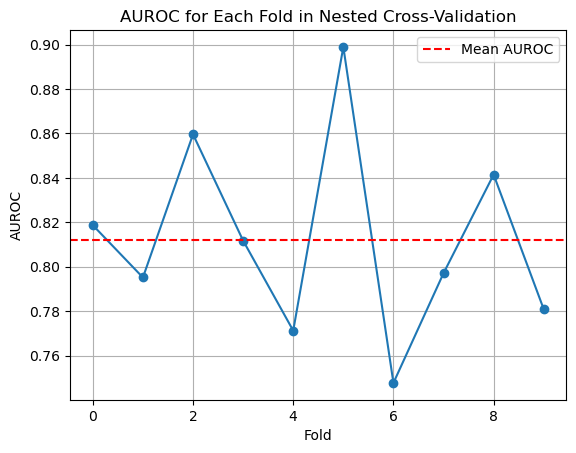

,AUROC,precision,recall,f1,PPV,NPV,Sensitivity,Specificity,brier
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.812230,0.745292,0.744444,0.744118,0.745292,0.745642,0.744444,0.744444,0.178091
std,0.044727,0.039398,0.037725,0.038001,0.039398,0.041284,0.053672,0.050376,0.020987
min,0.747685,0.675000,0.694444,0.693498,0.675000,0.675000,0.638889,0.638889,0.134766
25%,0.784433,0.720313,0.715278,0.715121,0.720313,0.718149,0.708333,0.729167,0.166731
50%,0.804398,0.750000,0.750000,0.749613,0.750000,0.750000,0.750000,0.750000,0.181207
75%,0.835745,0.757371,0.760417,0.760383,0.757371,0.778795,0.777778,0.770833,0.190916
max,0.898920,0.805556,0.805556,0.805556,0.805556,0.805556,0.805556,0.805556,0.204832


In [83]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from imblearn.under_sampling import NearMiss

# define the SVM model
clf = RandomForestClassifier(random_state=42)

# Define the hyperparameters to tune using a grid search
param_grid = {
    "n_estimators": [50, 100, 150, 200, 250, 300],
    "max_depth": [3, 5, 10, 15, 20],
    "criterion": ["gini", "entropy"]
}

# Define the outer loop for nested cross-validation with stratified k-fold
outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define the inner loop for hyperparameter tuning with k-fold
inner_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform nested cross-validation
nested_scores = []

# Initialize a list to store AUROC values for each fold
auroc_values = []

#oversample
oversampler = SMOTE(random_state=42)
#X, y = oversampler.fit_resample(X, y)
for i, (train, test) in enumerate(outer_cv.split(X, y)):   
        X_train = X[train]
        y_train = y[train]
        X_test = X[test]
        y_test = y[test]    

        oversampler = SMOTE(random_state=42)
        X_train, y_train = oversampler.fit_resample(X_train, y_train)
        X_test, y_test = oversampler.fit_resample(X_test, y_test)
        gs_score = []
    # Use grid search to tune hyperparameters on the inner loop
        grid_search = GridSearchCV(clf, param_grid=param_grid, cv=inner_cv, scoring='roc_auc')
        grid_search.fit(X_train, y_train)
        print(grid_search.best_params_)

        # print the mean and standard deviation of the AUROC scores
        y_pred = grid_search.predict(X_test)
        gs_score.append(roc_auc_score(y_test, y_pred))
        print('AUROC gridsearch mean: %0.3f (+/- %0.3f)' % (np.mean(gs_score), np.std(gs_score)))

         # Evaluate the model on the testing set from the outer loop
        confusion_mat = confusion_matrix(y_test, y_pred)
         #sensitivity, specificity, 
        #precision, recall, f1, npv, specificity = calculate_metrics(confusion_mat)
        #ppv, npv

        nested_scores.append({
        'AUROC': roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1]),
        'precision': precision_score(y_test, y_pred, average='binary'),
        'recall': recall_score(y_test, y_pred, average='weighted'),
        'f1': f1_score(y_test, y_pred, average='weighted'),
        #'AUROC': roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1]),
        'PPV': precision_score(y_test, y_pred, average='binary', pos_label=1),
        'NPV': precision_score(y_test, y_pred, average='binary', pos_label=0),
        'Sensitivity': recall_score(y_test, y_pred, average='binary', pos_label=1),
        'Specificity': recall_score(y_test, y_pred, average='binary', pos_label=0),
        'brier' : brier_score_loss(y_test, grid_search.predict_proba(X_test)[:, 1])

        })

# Calculate the mean AUROC across all folds
mean_auroc = np.mean([score['AUROC'] for score in nested_scores])

# Create a plot to visualize the mean AUROC value
plt.figure()
plt.plot(range(len(nested_scores)), [score['AUROC'] for score in nested_scores], marker='o', linestyle='-')
plt.axhline(y=mean_auroc, color='r', linestyle='--', label='Mean AUROC')
plt.xlabel('Fold')
plt.ylabel('AUROC')
plt.title('AUROC for Each Fold in Nested Cross-Validation')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
# Print the mean and standard deviation of the scores
score = pd.DataFrame(nested_scores)
score.describe()

##### with just oversample trian

{'criterion': 'gini', 'max_depth': 15, 'n_estimators': 250}
AUROC gridsearch mean: 0.708 (+/- 0.000)
{'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 100}
AUROC gridsearch mean: 0.750 (+/- 0.000)
{'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 200}
AUROC gridsearch mean: 0.792 (+/- 0.000)
{'criterion': 'gini', 'max_depth': 15, 'n_estimators': 150}
AUROC gridsearch mean: 0.764 (+/- 0.000)
{'criterion': 'gini', 'max_depth': 20, 'n_estimators': 300}
AUROC gridsearch mean: 0.750 (+/- 0.000)
{'criterion': 'gini', 'max_depth': 15, 'n_estimators': 150}
AUROC gridsearch mean: 0.806 (+/- 0.000)
{'criterion': 'gini', 'max_depth': 20, 'n_estimators': 300}
AUROC gridsearch mean: 0.691 (+/- 0.000)
{'criterion': 'gini', 'max_depth': 20, 'n_estimators': 100}
AUROC gridsearch mean: 0.733 (+/- 0.000)
{'criterion': 'gini', 'max_depth': 20, 'n_estimators': 200}
AUROC gridsearch mean: 0.746 (+/- 0.000)
{'criterion': 'gini', 'max_depth': 15, 'n_estimators': 200}
AUROC gridsearch mean: 0.

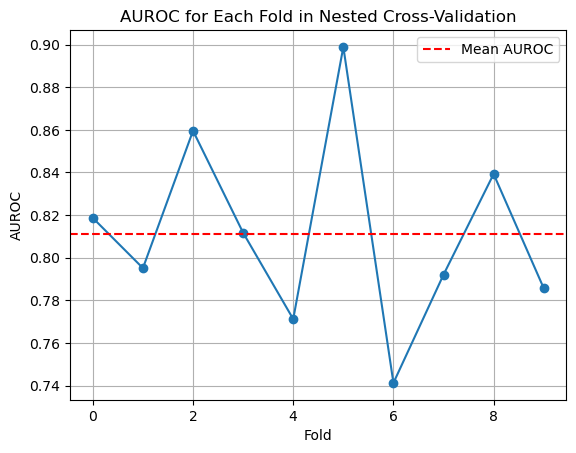

,AUROC,precision,recall,f1,PPV,NPV,Sensitivity,Specificity,brier
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.811358,0.744578,0.744268,0.743953,0.744578,0.746385,0.745873,0.743095,0.178613
std,0.045511,0.039368,0.037154,0.037412,0.039368,0.042606,0.054339,0.049900,0.021356
min,0.741270,0.675000,0.690141,0.689402,0.675000,0.666667,0.638889,0.638889,0.134766
25%,0.787302,0.720313,0.714349,0.714227,0.720313,0.718379,0.706548,0.727381,0.167473
50%,0.803434,0.746429,0.748239,0.747852,0.746429,0.750000,0.760714,0.750000,0.181207
75%,0.834132,0.757371,0.760417,0.760383,0.757371,0.778795,0.777778,0.766071,0.190740
max,0.898920,0.805556,0.805556,0.805556,0.805556,0.805556,0.805556,0.805556,0.207677


In [84]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from imblearn.under_sampling import NearMiss

# define the SVM model
clf = RandomForestClassifier(random_state=42)

# Define the hyperparameters to tune using a grid search
param_grid = {
    "n_estimators": [50, 100, 150, 200, 250, 300],
    "max_depth": [3, 5, 10, 15, 20],
    "criterion": ["gini", "entropy"]
}

# Define the outer loop for nested cross-validation with stratified k-fold
outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define the inner loop for hyperparameter tuning with k-fold
inner_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform nested cross-validation
nested_scores = []

# Initialize a list to store AUROC values for each fold
auroc_values = []

#oversample
oversampler = SMOTE(random_state=42)
#X, y = oversampler.fit_resample(X, y)
for i, (train, test) in enumerate(outer_cv.split(X, y)):   
        X_train = X[train]
        y_train = y[train]
        X_test = X[test]
        y_test = y[test]    

        oversampler = SMOTE(random_state=42)
        X_train, y_train = oversampler.fit_resample(X_train, y_train)
        #X_test, y_test = oversampler.fit_resample(X_test, y_test)
        gs_score = []
    # Use grid search to tune hyperparameters on the inner loop
        grid_search = GridSearchCV(clf, param_grid=param_grid, cv=inner_cv, scoring='roc_auc')
        grid_search.fit(X_train, y_train)
        print(grid_search.best_params_)

        # print the mean and standard deviation of the AUROC scores
        y_pred = grid_search.predict(X_test)
        gs_score.append(roc_auc_score(y_test, y_pred))
        print('AUROC gridsearch mean: %0.3f (+/- %0.3f)' % (np.mean(gs_score), np.std(gs_score)))

         # Evaluate the model on the testing set from the outer loop
        confusion_mat = confusion_matrix(y_test, y_pred)
         #sensitivity, specificity, 
        #precision, recall, f1, npv, specificity = calculate_metrics(confusion_mat)
        #ppv, npv

        nested_scores.append({
        'AUROC': roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1]),
        'precision': precision_score(y_test, y_pred, average='binary'),
        'recall': recall_score(y_test, y_pred, average='weighted'),
        'f1': f1_score(y_test, y_pred, average='weighted'),
        #'AUROC': roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1]),
        'PPV': precision_score(y_test, y_pred, average='binary', pos_label=1),
        'NPV': precision_score(y_test, y_pred, average='binary', pos_label=0),
        'Sensitivity': recall_score(y_test, y_pred, average='binary', pos_label=1),
        'Specificity': recall_score(y_test, y_pred, average='binary', pos_label=0),
        'brier' : brier_score_loss(y_test, grid_search.predict_proba(X_test)[:, 1])

        })

# Calculate the mean AUROC across all folds
mean_auroc = np.mean([score['AUROC'] for score in nested_scores])

# Create a plot to visualize the mean AUROC value
plt.figure()
plt.plot(range(len(nested_scores)), [score['AUROC'] for score in nested_scores], marker='o', linestyle='-')
plt.axhline(y=mean_auroc, color='r', linestyle='--', label='Mean AUROC')
plt.xlabel('Fold')
plt.ylabel('AUROC')
plt.title('AUROC for Each Fold in Nested Cross-Validation')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
# Print the mean and standard deviation of the scores
score = pd.DataFrame(nested_scores)
score.describe()